In [3]:
from google.colab import files
uploaded = files.upload()

Saving df_ingredient.csv to df_ingredient.csv


In [3]:
!pip3 install gensim

  Using cached https://files.pythonhosted.org/packages/09/ed/b59a2edde05b7f5755ea68648487c150c7c742361e9c8733c6d4ca005020/gensim-3.8.1-cp37-cp37m-win_amd64.whl
Processing c:\users\vacha\appdata\local\pip\cache\wheels\ab\10\93\5cff86f5b721d77edaecc29959b1c60d894be1f66d91407d28\smart_open-1.9.0-cp37-none-any.whl
  Using cached https://files.pythonhosted.org/packages/67/17/567f679dac6ec93611ce05637094e9736afa40e41c9ed0aaefd90de6f7e8/boto3-1.10.28-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/16/8a/1fc3dba0c4923c2a76e1ff0d52b305c44606da63f718d14d3231e21c51b0/s3transfer-0.2.1-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/8e/b3/ab9044d3aa14208f5b6f69665d5f82ad9b028809666e4e70dac1ab0bfd3a/botocore-1.13.28-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/83/94/7179c3832a6d45b266ddb2aac329e101367fbdb11f425f13771d27f225bb/jmespath-0.9.4-py2.py3-none-any.whl


In [4]:
import pandas as pd
from sklearn.manifold import TSNE
import re
import matplotlib.pyplot as plt
from gensim import models as g

In [6]:
with open('df_ingredient.csv', 'r', encoding='utf-8') as f:
  lines = f.readlines()

In [7]:
lines

[',id,recipe,ingredient\n',
 '0,7980ed28ce35467482b9858b86a5650d,ยำคะน้าหมูสับ,ผักคะน้า\n',
 '1,7980ed28ce35467482b9858b86a5650d,ยำคะน้าหมูสับ,หมูสับ\n',
 '2,7980ed28ce35467482b9858b86a5650d,ยำคะน้าหมูสับ,คนอร์หมู\n',
 '3,7980ed28ce35467482b9858b86a5650d,ยำคะน้าหมูสับ,น้ำมะนาว\n',
 '4,7980ed28ce35467482b9858b86a5650d,ยำคะน้าหมูสับ,หอมแดง\n',
 '5,7980ed28ce35467482b9858b86a5650d,ยำคะน้าหมูสับ,พริก\n',
 '6,7980ed28ce35467482b9858b86a5650d,ยำคะน้าหมูสับ,น้ำปลา\n',
 '7,7980ed28ce35467482b9858b86a5650d,ยำคะน้าหมูสับ,น้ำเชื่อม\n',
 '8,7980ed28ce35467482b9858b86a5650d,ยำคะน้าหมูสับ,น้ำสะอาด\n',
 '9,7980ed28ce35467482b9858b86a5650d,ยำคะน้าหมูสับ,น้ำเย็น\n',
 '10,1968c8c9d6a64509a8ea0893d3482d04,ข้าวต้มสีนิลหมูสับ,ข้าวสีนิล\n',
 '11,1968c8c9d6a64509a8ea0893d3482d04,ข้าวต้มสีนิลหมูสับ,น้ำสะอาด\n',
 '12,1968c8c9d6a64509a8ea0893d3482d04,ข้าวต้มสีนิลหมูสับ,หมูสับ\n',
 '13,1968c8c9d6a64509a8ea0893d3482d04,ข้าวต้มสีนิลหมูสับ,คนอร์หมู\n',
 '14,1968c8c9d6a64509a8ea0893d3482d04,ข้าวต้มสีนิลหมูสับ,พริกไท

In [8]:
all_menu = []
word2vec_menu = []
list_menu = []
main_menu = ""
for line in lines:
  l = line.split(',')
  try:
    menu = l[2]
    ingredient = l[3].replace("\n", "")
    print(l)
    if main_menu == menu:
      list_menu.append(ingredient)
    else:
      print("Not competable")
      print(list_menu)
      all_menu.append([main_menu,list_menu])
      word2vec_menu.append(list_menu)
      main_menu = menu
      list_menu = []
      list_menu.append(ingredient)
  except:
    continue

['', 'id', 'recipe', 'ingredient\n']
Not competable
[]
['0', '7980ed28ce35467482b9858b86a5650d', 'ยำคะน้าหมูสับ', 'ผักคะน้า\n']
Not competable
['ingredient']
['1', '7980ed28ce35467482b9858b86a5650d', 'ยำคะน้าหมูสับ', 'หมูสับ\n']
['2', '7980ed28ce35467482b9858b86a5650d', 'ยำคะน้าหมูสับ', 'คนอร์หมู\n']
['3', '7980ed28ce35467482b9858b86a5650d', 'ยำคะน้าหมูสับ', 'น้ำมะนาว\n']
['4', '7980ed28ce35467482b9858b86a5650d', 'ยำคะน้าหมูสับ', 'หอมแดง\n']
['5', '7980ed28ce35467482b9858b86a5650d', 'ยำคะน้าหมูสับ', 'พริก\n']
['6', '7980ed28ce35467482b9858b86a5650d', 'ยำคะน้าหมูสับ', 'น้ำปลา\n']
['7', '7980ed28ce35467482b9858b86a5650d', 'ยำคะน้าหมูสับ', 'น้ำเชื่อม\n']
['8', '7980ed28ce35467482b9858b86a5650d', 'ยำคะน้าหมูสับ', 'น้ำสะอาด\n']
['9', '7980ed28ce35467482b9858b86a5650d', 'ยำคะน้าหมูสับ', 'น้ำเย็น\n']
['10', '1968c8c9d6a64509a8ea0893d3482d04', 'ข้าวต้มสีนิลหมูสับ', 'ข้าวสีนิล\n']
Not competable
['ผักคะน้า', 'หมูสับ', 'คนอร์หมู', 'น้ำมะนาว', 'หอมแดง', 'พริก', 'น้ำปลา', 'น้ำเชื่อม', 'น้ำสะอาด', 

Not competable
['แป้งเค้ก', 'โกโก้', 'เนย', 'ดาร์กช็อกโกแลต', 'ไข่ไก่', 'ไข่แดง', 'น้ำตาล', 'นมสด']
['726', 'e8515bf8915143c08fbcc5eece9a674c', 'ผัดผักบุ้งไข่ขาวกรอบ', 'ไข่ขาว\n']
['727', 'e8515bf8915143c08fbcc5eece9a674c', 'ผัดผักบุ้งไข่ขาวกรอบ', 'คนอร์หมู\n']
['728', 'e8515bf8915143c08fbcc5eece9a674c', 'ผัดผักบุ้งไข่ขาวกรอบ', 'น้ำเปล่า\n']
['729', 'e8515bf8915143c08fbcc5eece9a674c', 'ผัดผักบุ้งไข่ขาวกรอบ', 'พริก\n']
['730', 'e8515bf8915143c08fbcc5eece9a674c', 'ผัดผักบุ้งไข่ขาวกรอบ', 'น้ำตาล\n']
['731', 'e8515bf8915143c08fbcc5eece9a674c', 'ผัดผักบุ้งไข่ขาวกรอบ', 'น้ำมันมะกอก\n']
['732', 'e8515bf8915143c08fbcc5eece9a674c', 'ผัดผักบุ้งไข่ขาวกรอบ', 'กระเทียม\n']
['733', 'ed2d3d69972a4d3f808d9af09b23f623', 'ไข่เจียวมาม่ากรอบชีสทอด', 'ไข่ไก่\n']
Not competable
['ผักบุ้ง', 'ไข่ขาว', 'คนอร์หมู', 'น้ำเปล่า', 'พริก', 'น้ำตาล', 'น้ำมันมะกอก', 'กระเทียม']
['734', 'ed2d3d69972a4d3f808d9af09b23f623', 'ไข่เจียวมาม่ากรอบชีสทอด', 'บะหมี่กึ่งสำเร็จรูป\n']
['735', 'ed2d3d69972a4d3f808d9af09b23f623', 'ไ

['1572', 'ce511cdd319648c687dfe093615ea66d', 'ผัดหมี่เบตง ( เจ )', 'เกลือ\n']
['1573', '3a753d2212da43268b04c7e1bfaa8454', 'เห็ดออรินจิคั่วพริกเกลือ (เจ)', 'เห็ดออรินจิ\n']
Not competable
['หมี่เบตง', 'ถั่วงอก', 'แครอทฝอย', 'ฟองเต้าหู้ทอดกรอบ', 'คื่นไฉ่', 'ซอสปรุงรส', 'เกลือ']
['1574', '3a753d2212da43268b04c7e1bfaa8454', 'เห็ดออรินจิคั่วพริกเกลือ (เจ)', 'พริกจินดาแดง\n']
['1575', '3a753d2212da43268b04c7e1bfaa8454', 'เห็ดออรินจิคั่วพริกเกลือ (เจ)', 'คึ่นไฉ่\n']
['1576', '3a753d2212da43268b04c7e1bfaa8454', 'เห็ดออรินจิคั่วพริกเกลือ (เจ)', 'เกลือ\n']
['1577', '3a753d2212da43268b04c7e1bfaa8454', 'เห็ดออรินจิคั่วพริกเกลือ (เจ)', 'น้ำตาล\n']
['1578', '63b6856c3f464da69d5435510febe572', 'หน่อไม้ผัดขี้เมา (เจ)', 'หน่อไม้หวาน\n']
Not competable
['เห็ดออรินจิ', 'พริกจินดาแดง', 'คึ่นไฉ่', 'เกลือ', 'น้ำตาล']
['1579', '63b6856c3f464da69d5435510febe572', 'หน่อไม้ผัดขี้เมา (เจ)', 'เห็ดออรินจิ\n']
['1580', '63b6856c3f464da69d5435510febe572', 'หน่อไม้ผัดขี้เมา (เจ)', 'เนื้อเป็ดเจ\n']
['1581', '63b6856c

['2354', 'd51a0d276e20472c800508468b1ce6ca', 'Fresh Kiwi Smoothie', 'เกลือ\n']
['2355', '8d08d353bdd4449a8795c47bcc5c50ad', 'ผัดถั่วงอกทรงเครื่อง', 'ถั่วงอก\n']
Not competable
['กีวี่แช่ฟรีซ', 'น้ำแข็ง', 'มะนาว', 'น้ำเชื่อม', 'เกลือ']
['2356', '8d08d353bdd4449a8795c47bcc5c50ad', 'ผัดถั่วงอกทรงเครื่อง', 'แครอท\n']
['2357', '8d08d353bdd4449a8795c47bcc5c50ad', 'ผัดถั่วงอกทรงเครื่อง', 'ต้มหอม\n']
['2358', '8d08d353bdd4449a8795c47bcc5c50ad', 'ผัดถั่วงอกทรงเครื่อง', 'หมูสับ\n']
['2359', '8d08d353bdd4449a8795c47bcc5c50ad', 'ผัดถั่วงอกทรงเครื่อง', 'เต้าหู้\n']
['2360', '8d08d353bdd4449a8795c47bcc5c50ad', 'ผัดถั่วงอกทรงเครื่อง', 'น้ำเปล่า\n']
['2361', '8d08d353bdd4449a8795c47bcc5c50ad', 'ผัดถั่วงอกทรงเครื่อง', 'อร่อยชัวร์\n']
['2362', '8d08d353bdd4449a8795c47bcc5c50ad', 'ผัดถั่วงอกทรงเครื่อง', 'น้ำตาล\n']
['2363', '8d08d353bdd4449a8795c47bcc5c50ad', 'ผัดถั่วงอกทรงเครื่อง', 'น้ำมันหอย\n']
['2364', '8d08d353bdd4449a8795c47bcc5c50ad', 'ผัดถั่วงอกทรงเครื่อง', 'พริกไทย\n']
['2365', '055e00d7c3cc4fed

['3214', 'a219ec2ed888419fafc42419257cb53b', 'ข้าวคลุกพริกไข่เค็ม', 'ข้าวสวย\n']
['3215', 'a219ec2ed888419fafc42419257cb53b', 'ข้าวคลุกพริกไข่เค็ม', 'ไข่เค็ม\n']
['3216', '031501832be44e8882762ecaf8501686', 'กะเพรากุนเชียง', 'กุนเชียง\n']
Not competable
['หมูสามชั้น', 'พริกแกงคั่ว', 'ถั่วฝักยาว', 'น้ำมันพืช', 'อร่อยชัวร์', 'น้ำตาล', 'น้ำเปล่า', 'ข้าวสวย', 'ไข่เค็ม']
['3217', '031501832be44e8882762ecaf8501686', 'กะเพรากุนเชียง', 'น้ำมันพืช\n']
['3218', '031501832be44e8882762ecaf8501686', 'กะเพรากุนเชียง', 'พริกขี้หนู\n']
['3219', '031501832be44e8882762ecaf8501686', 'กะเพรากุนเชียง', 'ใบกะเพรา\n']
['3220', '031501832be44e8882762ecaf8501686', 'กะเพรากุนเชียง', 'น้ำตาล\n']
['3221', '031501832be44e8882762ecaf8501686', 'กะเพรากุนเชียง', 'อร่อยชัวร์\n']
['3222', '031501832be44e8882762ecaf8501686', 'กะเพรากุนเชียง', 'น้ำเปล่า\n']
['3223', '755b726a3ee443d58314720e2e352c16', 'Mexican fried chicken bites', 'อกไก่\n']
Not competable
['กุนเชียง', 'น้ำมันพืช', 'พริกขี้หนู', 'ใบกะเพรา', 'น้ำตาล', 'อ

['หมูสับ', 'พริกแกง', 'ไข่ไก่', 'ผงปรุงรสหมู', 'ซอสหอยนางรม', 'ถั่วฝักยาว', 'ใบมะกรูด', 'น้ำมันพืช']
['3897', '63bd23e48de34ba5a895e06a7697c23c', 'ผัดฉ่าหมูเด้งเดือด 🔥', 'น้ำเปล่า\n']
['3898', '63bd23e48de34ba5a895e06a7697c23c', 'ผัดฉ่าหมูเด้งเดือด 🔥', 'น้ำมันพืช\n']
['3899', '63bd23e48de34ba5a895e06a7697c23c', 'ผัดฉ่าหมูเด้งเดือด 🔥', 'พริกขี้หนู\n']
['3900', '63bd23e48de34ba5a895e06a7697c23c', 'ผัดฉ่าหมูเด้งเดือด 🔥', 'กระเทียม\n']
['3901', '63bd23e48de34ba5a895e06a7697c23c', 'ผัดฉ่าหมูเด้งเดือด 🔥', 'กระชาย\n']
['3902', '63bd23e48de34ba5a895e06a7697c23c', 'ผัดฉ่าหมูเด้งเดือด 🔥', 'พริกไทยอ่อน\n']
['3903', '63bd23e48de34ba5a895e06a7697c23c', 'ผัดฉ่าหมูเด้งเดือด 🔥', 'พริกชี้ฟ้า\n']
['3904', '63bd23e48de34ba5a895e06a7697c23c', 'ผัดฉ่าหมูเด้งเดือด 🔥', 'น้ำตาล\n']
['3905', '63bd23e48de34ba5a895e06a7697c23c', 'ผัดฉ่าหมูเด้งเดือด 🔥', 'ซอสหอยนางรม\n']
['3906', '63bd23e48de34ba5a895e06a7697c23c', 'ผัดฉ่าหมูเด้งเดือด 🔥', 'ผงปรุงรสหมู\n']
['3907', '4a7682535a044d7ab648cecbda379e10', 'กุ้งต้มหวาน',

['4499', 'dd1f83ee71d444e1aa787064f9ae0c62', 'หมูกระเทียมซอสข้น', 'กระเทียม\n']
['4500', '07ed3eb06b8a49308f278e097a690fe9', '🌿 สลัดไข่ต้ม 🐣', 'ไข่ต้ม\n']
Not competable
['เนื้อหมู', 'คนอร์ซอส', 'น้ำตาล', 'น้ำมันถั่วเหลือง', 'กระเทียม']
['4501', '07ed3eb06b8a49308f278e097a690fe9', '🌿 สลัดไข่ต้ม 🐣', 'ผักสามสี\n']
['4502', '07ed3eb06b8a49308f278e097a690fe9', '🌿 สลัดไข่ต้ม 🐣', 'มายองเนส\n']
['4503', '07ed3eb06b8a49308f278e097a690fe9', '🌿 สลัดไข่ต้ม 🐣', 'พริกไทย\n']
['4504', '07ed3eb06b8a49308f278e097a690fe9', '🌿 สลัดไข่ต้ม 🐣', 'เกลือ\n']
['4505', '0daa3cdf1fd040db82fb70aea084086b', 'Strawberry MilkShake 🍓', 'นมจืด\n']
Not competable
['ไข่ต้ม', 'ผักสามสี', 'มายองเนส', 'พริกไทย', 'เกลือ']
['4506', '0daa3cdf1fd040db82fb70aea084086b', 'Strawberry MilkShake 🍓', 'สตอเบอร์รี่ฟรีซหรือสด\n']
['4507', '0daa3cdf1fd040db82fb70aea084086b', 'Strawberry MilkShake 🍓', 'น้ำแข็ง\n']
['4508', '068babf38ef147f08b91adcba750a9bc', 'กุ้งผัดพริกสับ', 'กุ้ง\n']
Not competable
['นมจืด', 'สตอเบอร์รี่ฟรีซหรือสด', 'น

['5078', 'f49a674e674a4e4cadd48a42ef4df0d9', 'ไก่ผัดสมุนไพรสูตรคุณพ่อจ้าาา', 'ไก่ต้ม\n']
Not competable
['หมี่ซั่วกึ่งสำเร็จรูป', 'ต้นหอม', 'ซีอิ้วขาว', 'เกลือ']
['5079', 'f49a674e674a4e4cadd48a42ef4df0d9', 'ไก่ผัดสมุนไพรสูตรคุณพ่อจ้าาา', 'หน่อไม้\n']
['5080', 'f49a674e674a4e4cadd48a42ef4df0d9', 'ไก่ผัดสมุนไพรสูตรคุณพ่อจ้าาา', 'ใบยี่หร่า\n']
['5081', 'f49a674e674a4e4cadd48a42ef4df0d9', 'ไก่ผัดสมุนไพรสูตรคุณพ่อจ้าาา', 'กระเทียม\n']
['5082', 'f49a674e674a4e4cadd48a42ef4df0d9', 'ไก่ผัดสมุนไพรสูตรคุณพ่อจ้าาา', 'พริกไทดำ\n']
['5083', 'f49a674e674a4e4cadd48a42ef4df0d9', 'ไก่ผัดสมุนไพรสูตรคุณพ่อจ้าาา', 'ผักชี\n']
['5084', 'f49a674e674a4e4cadd48a42ef4df0d9', 'ไก่ผัดสมุนไพรสูตรคุณพ่อจ้าาา', 'พริกไทยสด\n']
['5085', 'f49a674e674a4e4cadd48a42ef4df0d9', 'ไก่ผัดสมุนไพรสูตรคุณพ่อจ้าาา', 'น้ำปลา\n']
['5086', 'f49a674e674a4e4cadd48a42ef4df0d9', 'ไก่ผัดสมุนไพรสูตรคุณพ่อจ้าาา', 'ซีอิ้วขาว\n']
['5087', 'f49a674e674a4e4cadd48a42ef4df0d9', 'ไก่ผัดสมุนไพรสูตรคุณพ่อจ้าาา', 'น้ำตาล\n']
['5088', '89023b71c2284f

['นมเปรี้ยว']
['5837', 'bc9ccee18b044001a398a635d8150501', 'น้ำอัญชันพุทรา', 'พุทราจีนแห้ง\n']
Not competable
['ดอกไม้ตกแต่ง']
['5838', 'bc9ccee18b044001a398a635d8150501', 'น้ำอัญชันพุทรา', 'ดอกอัญชันสด\n']
['5839', 'bc9ccee18b044001a398a635d8150501', 'น้ำอัญชันพุทรา', 'ใบเตย\n']
['5840', 'bc9ccee18b044001a398a635d8150501', 'น้ำอัญชันพุทรา', 'น้ำเปล่า\n']
['5841', 'bc9ccee18b044001a398a635d8150501', 'น้ำอัญชันพุทรา', 'น้ำตาล\n']
['5842', '5fb2976ddff24e02bd45e5f17c263136', 'หลุมพีเหล้าโซดา', 'ลูกหลุมพีดอง\n']
Not competable
['พุทราจีนแห้ง', 'ดอกอัญชันสด', 'ใบเตย', 'น้ำเปล่า', 'น้ำตาล']
['5843', '5fb2976ddff24e02bd45e5f17c263136', 'หลุมพีเหล้าโซดา', 'น้ำดองลูกหลุมพี\n']
['5844', '5fb2976ddff24e02bd45e5f17c263136', 'หลุมพีเหล้าโซดา', 'โซดา\n']
['5845', '5fb2976ddff24e02bd45e5f17c263136', 'หลุมพีเหล้าโซดา', 'เหล้า\n']
['5846', '5fb2976ddff24e02bd45e5f17c263136', 'หลุมพีเหล้าโซดา', 'น้ำแข็ง\n']
['5847', '768cfc519ddc403d92344625080a8d2b', 'ลำไยนมสดปั่น', 'เนื้อลำไยสด\n']
Not competable
['ล

['6451', 'c7cd6467f92340379896ccad02cf2fc0', 'แยมโรล', 'น้ำตาล\n']
['6452', 'c7cd6467f92340379896ccad02cf2fc0', 'แยมโรล', 'เกลือ\n']
['6453', 'c7cd6467f92340379896ccad02cf2fc0', 'แยมโรล', 'โอวาเลท\n']
['6454', 'c7cd6467f92340379896ccad02cf2fc0', 'แยมโรล', 'แป้งเค้ก\n']
['6455', 'c7cd6467f92340379896ccad02cf2fc0', 'แยมโรล', 'ผงฟู\n']
['6456', 'c7cd6467f92340379896ccad02cf2fc0', 'แยมโรล', 'นมข้นจืด\n']
['6457', 'c7cd6467f92340379896ccad02cf2fc0', 'แยมโรล', 'เนย\n']
['6458', 'c7cd6467f92340379896ccad02cf2fc0', 'แยมโรล', 'วานิลลา\n']
['6460', 'c7cd6467f92340379896ccad02cf2fc0', 'แยมโรล', 'เนย\n']
['6461', 'c7cd6467f92340379896ccad02cf2fc0', 'แยมโรล', 'เนย\n']
['6462', 'c7cd6467f92340379896ccad02cf2fc0', 'แยมโรล', 'ไอซิ่ง\n']
['6464', 'aac6f24155c34868b1e9688c20b9b059', 'คุกกี้สิงคโปร์', 'แป้งอเนกประสงค์\n']
Not competable
['ไข่ไก่', 'น้ำตาล', 'เกลือ', 'โอวาเลท', 'แป้งเค้ก', 'ผงฟู', 'นมข้นจืด', 'เนย', 'วานิลลา', 'เนย', 'เนย', 'ไอซิ่ง']
['6465', 'aac6f24155c34868b1e9688c20b9b059', 'คุกกี้สิง

['7192', '28921b1c31a14490ac949aa5aeb34554', 'แกงกะทิหัวปลี', 'น้ำตาล\n']
['7193', '28921b1c31a14490ac949aa5aeb34554', 'แกงกะทิหัวปลี', 'ผงปรุงรสหมู\n']
['7194', '28921b1c31a14490ac949aa5aeb34554', 'แกงกะทิหัวปลี', 'น้ำเปล่า\n']
['7195', 'dd5cf343800a4335bf808c2d5d616058', 'ไข่พะโล้หมูสามชั้น', 'หมูสามชั้น\n']
Not competable
['หัวปลีขนาดใหญ่', 'ใบเหลียง', 'หอมแดง', 'พริกไทดำ', 'กะปิ', 'เนย', 'เกลือ', 'น้ำตาล', 'ผงปรุงรสหมู', 'น้ำเปล่า']
['7196', 'dd5cf343800a4335bf808c2d5d616058', 'ไข่พะโล้หมูสามชั้น', 'ไข่ไก่\n']
['7197', 'dd5cf343800a4335bf808c2d5d616058', 'ไข่พะโล้หมูสามชั้น', 'ผักชี\n']
['7198', 'dd5cf343800a4335bf808c2d5d616058', 'ไข่พะโล้หมูสามชั้น', 'น้ำตาล\n']
['7199', 'dd5cf343800a4335bf808c2d5d616058', 'ไข่พะโล้หมูสามชั้น', 'ซีอิ้วดำ\n']
['7200', 'dd5cf343800a4335bf808c2d5d616058', 'ไข่พะโล้หมูสามชั้น', 'ผงพะโล้สำเร็จรูป\n']
['7201', 'dd5cf343800a4335bf808c2d5d616058', 'ไข่พะโล้หมูสามชั้น', 'น้ำเปล่า\n']
['7202', '973c3a9d273c4f3688044814e15475ef', 'กล้วยแขก', 'กล้วย\n']
Not 

['8162', '7a7cf62cd086408395deb23ca0c2b12a', 'ฝักแม้วอบไข่กับเบคอนกรุบกรอบ', 'มายองเนส\n']
['8163', '7a7cf62cd086408395deb23ca0c2b12a', 'ฝักแม้วอบไข่กับเบคอนกรุบกรอบ', 'ผักชี\n']
['8164', 'd9d95957ce174b4cba8483ac246e5910', 'ฟูโตะมากิซูชิ&แคลิฟอร์เนียเตมากิซูชิ', 'ข้าวเปรี้ยว\n']
Not competable
['ฝักแม้ว', 'เบคอน', 'สาหร่าย', 'ไข่ไก่', 'ซอสมะเขือเทศ', 'มายองเนส', 'ผักชี']
['8165', 'd9d95957ce174b4cba8483ac246e5910', 'ฟูโตะมากิซูชิ&แคลิฟอร์เนียเตมากิซูชิ', 'กุ้ง\n']
['8166', 'd9d95957ce174b4cba8483ac246e5910', 'ฟูโตะมากิซูชิ&แคลิฟอร์เนียเตมากิซูชิ', 'ปูอัด\n']
['8167', 'd9d95957ce174b4cba8483ac246e5910', 'ฟูโตะมากิซูชิ&แคลิฟอร์เนียเตมากิซูชิ', 'เคียวริ (แตงกว่าญี่ปุ่น)\n']
['8168', 'd9d95957ce174b4cba8483ac246e5910', 'ฟูโตะมากิซูชิ&แคลิฟอร์เนียเตมากิซูชิ', 'ตะก้วง (หัวไชเท้าดอง)\n']
['8169', 'd9d95957ce174b4cba8483ac246e5910', 'ฟูโตะมากิซูชิ&แคลิฟอร์เนียเตมากิซูชิ', 'ไคววาเหระ\n']
['8170', 'd9d95957ce174b4cba8483ac246e5910', 'ฟูโตะมากิซูชิ&แคลิฟอร์เนียเตมากิซูชิ', 'สาหร่ายโนริ\n']
['817

Not competable
['พริกแกงส้ม', 'ทูน่า', 'ไชเท้า', 'ถั่วฝักยาว', 'น้ำเต้า', 'มะขามเปียก', 'น้ำตาล', 'น้ำปลา']
['8880', 'd2f6267127c7491c865b0d254c897b72', 'ถั่วฝักยาวผัดพริกน้ำเงี้ยวหมูสับ', 'หมูสับ\n']
['8881', 'd2f6267127c7491c865b0d254c897b72', 'ถั่วฝักยาวผัดพริกน้ำเงี้ยวหมูสับ', 'พริกน้ำเงี้ยว\n']
['8882', 'd2f6267127c7491c865b0d254c897b72', 'ถั่วฝักยาวผัดพริกน้ำเงี้ยวหมูสับ', 'คนอร์ซอส\n']
['8883', 'd2f6267127c7491c865b0d254c897b72', 'ถั่วฝักยาวผัดพริกน้ำเงี้ยวหมูสับ', 'น้ำตาล\n']
['8884', '0a94922158664c5da237e3b741370519', 'ผัดกะเพราปูกุ้ง', 'เนื้อปูแกะ\n']
Not competable
['ถั่วฝักยาว', 'หมูสับ', 'พริกน้ำเงี้ยว', 'คนอร์ซอส', 'น้ำตาล']
['8885', '0a94922158664c5da237e3b741370519', 'ผัดกะเพราปูกุ้ง', 'กุ้ง\n']
['8886', '0a94922158664c5da237e3b741370519', 'ผัดกะเพราปูกุ้ง', 'กระเทียม\n']
['8887', '0a94922158664c5da237e3b741370519', 'ผัดกะเพราปูกุ้ง', 'พริกแดง\n']
['8888', '0a94922158664c5da237e3b741370519', 'ผัดกะเพราปูกุ้ง', 'กะเพรา\n']
['8889', '0a94922158664c5da237e3b741370519', 'ผ

Not competable
['กุ้งแห้ง', 'น้ำมัน']
['9583', '53cde923b67b4dc7b8117cbe7061496c', 'น้ำจิ้มซีอิ้วดำ', 'น้ำตาล\n']
['9584', '53cde923b67b4dc7b8117cbe7061496c', 'น้ำจิ้มซีอิ้วดำ', 'น้ำส้มสายชู\n']
['9585', '53cde923b67b4dc7b8117cbe7061496c', 'น้ำจิ้มซีอิ้วดำ', 'ซีอิ๊วดำ\n']
['9586', '0cd22a0e1a5c4e08b600b972455764c8', 'ไข่ต้มยางมะตูม', 'ไข่ไก่\n']
Not competable
['พริกจินดา', 'น้ำตาล', 'น้ำส้มสายชู', 'ซีอิ๊วดำ']
['9587', '0cd22a0e1a5c4e08b600b972455764c8', 'ไข่ต้มยางมะตูม', 'เกลือ\n']
['9588', '1c27702124f842f1b2c333ee8b0cfb3f', 'ข้าวต้มไก่ใส่ข่า', 'ไก่\n']
Not competable
['ไข่ไก่', 'เกลือ']
['9589', '1c27702124f842f1b2c333ee8b0cfb3f', 'ข้าวต้มไก่ใส่ข่า', 'ข่า\n']
['9590', '1c27702124f842f1b2c333ee8b0cfb3f', 'ข้าวต้มไก่ใส่ข่า', 'ต้นหอม\n']
['9591', '1c27702124f842f1b2c333ee8b0cfb3f', 'ข้าวต้มไก่ใส่ข่า', 'ผักชี\n']
['9592', '1c27702124f842f1b2c333ee8b0cfb3f', 'ข้าวต้มไก่ใส่ข่า', 'คนอร์ซอส\n']
['9593', '1c27702124f842f1b2c333ee8b0cfb3f', 'ข้าวต้มไก่ใส่ข่า', 'ซีอิ้วขาว\n']
['9594', '1c27702

['10376', '508d25b5d6544114b2309fb564fbaf42', 'ไข่เจียวหอมใหญ่มะเขือเทศ', 'ซอสปรุงรส\n']
['10377', '508d25b5d6544114b2309fb564fbaf42', 'ไข่เจียวหอมใหญ่มะเขือเทศ', 'น้ำมันหอย\n']
['10378', '64e8327b70d54faa84021b8e6a1e2323', 'ไข่ยัดไส้', 'ไข่ไก่\n']
Not competable
['ไข่ไก่', 'มะเขือเทศ', 'หัวหอมใหญ่', 'ซอสปรุงรส', 'น้ำมันหอย']
['10379', '64e8327b70d54faa84021b8e6a1e2323', 'ไข่ยัดไส้', 'หมูสับ\n']
['10380', '64e8327b70d54faa84021b8e6a1e2323', 'ไข่ยัดไส้', 'มะเขือเทศ หั่นพอดีคำ\n']
['10381', '64e8327b70d54faa84021b8e6a1e2323', 'ไข่ยัดไส้', 'หัวหอมใหญ่ หั่นพอดีคำ\n']
['10382', '64e8327b70d54faa84021b8e6a1e2323', 'ไข่ยัดไส้', 'แครอท\n']
['10383', '64e8327b70d54faa84021b8e6a1e2323', 'ไข่ยัดไส้', 'กระเทียม\n']
['10384', '64e8327b70d54faa84021b8e6a1e2323', 'ไข่ยัดไส้', 'น้ำมันหอย\n']
['10385', '64e8327b70d54faa84021b8e6a1e2323', 'ไข่ยัดไส้', 'ซอสปรุงรส\n']
['10386', '64e8327b70d54faa84021b8e6a1e2323', 'ไข่ยัดไส้', 'น้ำตาล\n']
['10387', 'fe3e8f920be74b8c99aa587434fb77ae', 'หมูป่าผัดเผ็ด', 'เนื้

['11146', 'ca8b86ff60e04d438555a31774e8d530', 'สปาเก็ตตี้คอร์นบีฟ', 'พริกขี้หนูซอย\n']
['11147', '03c8c391a31443c49d8c7ee4a1739052', 'น้ำลำไย', 'ลำไยแห้งเกรดดี\n']
Not competable
['Corned Beef', 'เส้นพาสต้า', 'น้ำมันมะกอก', 'กระเทียม', 'เกลือ', 'พริกขี้หนูซอย']
['11148', '03c8c391a31443c49d8c7ee4a1739052', 'น้ำลำไย', 'น้ำดื่ม\n']
['11149', '03c8c391a31443c49d8c7ee4a1739052', 'น้ำลำไย', 'น้ำตาล\n']
['11150', '03c8c391a31443c49d8c7ee4a1739052', 'น้ำลำไย', 'น้ำตาล\n']
['11151', '03c8c391a31443c49d8c7ee4a1739052', 'น้ำลำไย', 'เกลือ\n']
['11152', 'e7e7aa78e57e4feab4d9db069e110560', 'Spaghetti aglio e olio (Vegetarian)', 'เส้นพาสต้า\n']
Not competable
['ลำไยแห้งเกรดดี', 'น้ำดื่ม', 'น้ำตาล', 'น้ำตาล', 'เกลือ']
['11153', 'e7e7aa78e57e4feab4d9db069e110560', 'Spaghetti aglio e olio (Vegetarian)', 'กระเทียม\n']
['11154', 'e7e7aa78e57e4feab4d9db069e110560', 'Spaghetti aglio e olio (Vegetarian)', 'พริกแห้ง\n']
['11155', 'e7e7aa78e57e4feab4d9db069e110560', 'Spaghetti aglio e olio (Vegetarian)', 'ผงซ

['11786', '642c8d171ca64a96b4aab8538cae7ced', 'ข้าวหน้าไก่ใส่กุนเชียง', 'กระเทียม\n']
['11787', '642c8d171ca64a96b4aab8538cae7ced', 'ข้าวหน้าไก่ใส่กุนเชียง', 'พริกไทดำ\n']
['11788', '642c8d171ca64a96b4aab8538cae7ced', 'ข้าวหน้าไก่ใส่กุนเชียง', 'คนอร์ซอส\n']
['11789', '642c8d171ca64a96b4aab8538cae7ced', 'ข้าวหน้าไก่ใส่กุนเชียง', 'น้ำตาล\n']
['11790', '642c8d171ca64a96b4aab8538cae7ced', 'ข้าวหน้าไก่ใส่กุนเชียง', 'ซอสปรุงรส\n']
['11791', '642c8d171ca64a96b4aab8538cae7ced', 'ข้าวหน้าไก่ใส่กุนเชียง', 'คนอร์ไก่\n']
['11792', '642c8d171ca64a96b4aab8538cae7ced', 'ข้าวหน้าไก่ใส่กุนเชียง', 'พริกไทยป่น\n']
['11793', '642c8d171ca64a96b4aab8538cae7ced', 'ข้าวหน้าไก่ใส่กุนเชียง', 'พริกชี้ฟ้าแดง\n']
['11794', '642c8d171ca64a96b4aab8538cae7ced', 'ข้าวหน้าไก่ใส่กุนเชียง', 'ต้นหอม\n']
['11795', '642c8d171ca64a96b4aab8538cae7ced', 'ข้าวหน้าไก่ใส่กุนเชียง', 'ผักชี\n']
['11796', '642c8d171ca64a96b4aab8538cae7ced', 'ข้าวหน้าไก่ใส่กุนเชียง', 'น้ำเปล่า\n']
['11797', '642c8d171ca64a96b4aab8538cae7ced', 'ข้าวหน

['ไข่ไก่', 'ดอกอัญชัน', 'คนอร์ไก่', 'พริกไทย', 'น้ำตาล', 'น้ำมัน']
['12487', '6177744b4cd743d6a0bcf4877305d83f', 'หมูรากผักชี', 'ผักชี\n']
['12488', '6177744b4cd743d6a0bcf4877305d83f', 'หมูรากผักชี', 'คนอร์ไก่\n']
['12489', '6177744b4cd743d6a0bcf4877305d83f', 'หมูรากผักชี', 'ซีอิ้วขาว\n']
['12490', '6177744b4cd743d6a0bcf4877305d83f', 'หมูรากผักชี', 'น้ำตาล\n']
['12491', '6177744b4cd743d6a0bcf4877305d83f', 'หมูรากผักชี', 'พริกไทย\n']
['12492', '6177744b4cd743d6a0bcf4877305d83f', 'หมูรากผักชี', 'กระเทียม\n']
['12493', '6177744b4cd743d6a0bcf4877305d83f', 'หมูรากผักชี', 'น้ำมัน\n']
['12494', '6177744b4cd743d6a0bcf4877305d83f', 'หมูรากผักชี', 'ผักชี\n']
['12495', 'c288b594791e48bbab28428e3cb01724', 'ข้าวอัญชันหมูทอดชมสวน', 'หมูสันใน\n']
Not competable
['เนื้อหมู', 'ผักชี', 'คนอร์ไก่', 'ซีอิ้วขาว', 'น้ำตาล', 'พริกไทย', 'กระเทียม', 'น้ำมัน', 'ผักชี']
['12496', 'c288b594791e48bbab28428e3cb01724', 'ข้าวอัญชันหมูทอดชมสวน', 'ข้าวญี่ปุ่น\n']
['12497', 'c288b594791e48bbab28428e3cb01724', 'ข้าวอัญชั

['13102', '340538b5969f4684a0752f7eaa54a386', 'Dahi Baingan แกงมะเขือม่วงอินเดียใส่โยเกิร์ต 🇮🇳', 'ผักชี\n']
['13103', '340538b5969f4684a0752f7eaa54a386', 'Dahi Baingan แกงมะเขือม่วงอินเดียใส่โยเกิร์ต 🇮🇳', 'โยเกิร์ต\n']
['13104', '340538b5969f4684a0752f7eaa54a386', 'Dahi Baingan แกงมะเขือม่วงอินเดียใส่โยเกิร์ต 🇮🇳', 'มัสตาร์ด\n']
['13105', '340538b5969f4684a0752f7eaa54a386', 'Dahi Baingan แกงมะเขือม่วงอินเดียใส่โยเกิร์ต 🇮🇳', 'ขิงขูด\n']
['13106', '340538b5969f4684a0752f7eaa54a386', 'Dahi Baingan แกงมะเขือม่วงอินเดียใส่โยเกิร์ต 🇮🇳', 'Cumin seed\n']
['13107', '340538b5969f4684a0752f7eaa54a386', 'Dahi Baingan แกงมะเขือม่วงอินเดียใส่โยเกิร์ต 🇮🇳', 'bay leaf\n']
['13108', '340538b5969f4684a0752f7eaa54a386', 'Dahi Baingan แกงมะเขือม่วงอินเดียใส่โยเกิร์ต 🇮🇳', 'หอมแขกซอย\n']
['13109', '340538b5969f4684a0752f7eaa54a386', 'Dahi Baingan แกงมะเขือม่วงอินเดียใส่โยเกิร์ต 🇮🇳', 'tumeric powder\n']
['13110', '340538b5969f4684a0752f7eaa54a386', 'Dahi Baingan แกงมะเขือม่วงอินเดียใส่โยเกิร์ต 🇮🇳', 'coriander 

['14038', '41e8ed7e44be49ff80f4c428923b06d5', 'ข้าวเนื้อผัดน้ำมันหอย สไตล์กวางตุ้งแท้ๆ Hong Kong 🇭🇰', 'แป้งมัน\n']
['14039', '41e8ed7e44be49ff80f4c428923b06d5', 'ข้าวเนื้อผัดน้ำมันหอย สไตล์กวางตุ้งแท้ๆ Hong Kong 🇭🇰', 'ซีอิ้วขาว\n']
['14040', '41e8ed7e44be49ff80f4c428923b06d5', 'ข้าวเนื้อผัดน้ำมันหอย สไตล์กวางตุ้งแท้ๆ Hong Kong 🇭🇰', 'เหล้าจีน\n']
['14041', '41e8ed7e44be49ff80f4c428923b06d5', 'ข้าวเนื้อผัดน้ำมันหอย สไตล์กวางตุ้งแท้ๆ Hong Kong 🇭🇰', 'น้ำมันหอย\n']
['14042', '41e8ed7e44be49ff80f4c428923b06d5', 'ข้าวเนื้อผัดน้ำมันหอย สไตล์กวางตุ้งแท้ๆ Hong Kong 🇭🇰', 'พริกไทขาว\n']
['14043', '41e8ed7e44be49ff80f4c428923b06d5', 'ข้าวเนื้อผัดน้ำมันหอย สไตล์กวางตุ้งแท้ๆ Hong Kong 🇭🇰', 'จิ๊กโฉว่\n']
['14044', '41e8ed7e44be49ff80f4c428923b06d5', 'ข้าวเนื้อผัดน้ำมันหอย สไตล์กวางตุ้งแท้ๆ Hong Kong 🇭🇰', 'น้ำเปล่า\n']
['14045', '41e8ed7e44be49ff80f4c428923b06d5', 'ข้าวเนื้อผัดน้ำมันหอย สไตล์กวางตุ้งแท้ๆ Hong Kong 🇭🇰', 'ขิงสับ\n']
['14046', '41e8ed7e44be49ff80f4c428923b06d5', 'ข้าวเนื้อผัดน้ำมันหอย สไต

['14644', 'e4a70195e7cd4215b46ff1355752dbef', '"“ราดหน้าเส้นหมี่อกไก่"""', 'พริกไทยป่น\n']
['14645', 'e4a70195e7cd4215b46ff1355752dbef', '"“ราดหน้าเส้นหมี่อกไก่"""', 'อกไก่หั่น\n']
['14646', 'e4a70195e7cd4215b46ff1355752dbef', '"“ราดหน้าเส้นหมี่อกไก่"""', 'คะน้า\n']
['14647', 'e4a70195e7cd4215b46ff1355752dbef', '"“ราดหน้าเส้นหมี่อกไก่"""', 'แครอท\n']
['14648', 'e4a70195e7cd4215b46ff1355752dbef', '"“ราดหน้าเส้นหมี่อกไก่"""', 'ข้าวโพดอ่อน\n']
['14649', 'e4a70195e7cd4215b46ff1355752dbef', '"“ราดหน้าเส้นหมี่อกไก่"""', 'ถั่วลันเตา\n']
['14650', 'e4a70195e7cd4215b46ff1355752dbef', '"“ราดหน้าเส้นหมี่อกไก่"""', 'แป้งมันละลายน้ำ\n']
['14651', 'e4a70195e7cd4215b46ff1355752dbef', '"“ราดหน้าเส้นหมี่อกไก่"""', 'ซีอิ้วดำ\n']
['14652', '5b521a1a28fb450db353630fe5b6057e', '"“สามชั้นผัดกะปิ"""', 'หมูสามชั้น\n']
Not competable
['น้ำสะอาด', 'น้ำตาล', 'ผงปรุงรส', 'ซอสปรุงรส', 'น้ำมันหอย', 'เต้าเจี้ยว', 'พริกไทยป่น', 'อกไก่หั่น', 'คะน้า', 'แครอท', 'ข้าวโพดอ่อน', 'ถั่วลันเตา', 'แป้งมันละลายน้ำ', 'ซีอิ้วดำ']

Not competable
['น้ำมัน', 'กระเทียม', 'ปลาหมึก', 'ไข่เค็ม', 'น้ำต้มสุก', 'น้ำตาล', 'ซีอิ้วขาว', 'น้ำมันหอย', 'น้ำพริกเผา', 'หอมใหญ่', 'พริกอ่อน', 'ต้นหอม', 'ตั้งโอ๋']
['15404', '0ffecea24ea048b19cfb30309f116900', '“ยำมาม่าหมูยอ”', 'พริกขี้หนูตำ\n']
['15405', '0ffecea24ea048b19cfb30309f116900', '“ยำมาม่าหมูยอ”', 'เห็ดเข็มทองลวก\n']
['15406', '0ffecea24ea048b19cfb30309f116900', '“ยำมาม่าหมูยอ”', 'เห็ดหูหนูลวก\n']
['15407', '0ffecea24ea048b19cfb30309f116900', '“ยำมาม่าหมูยอ”', 'หอมใหญ่\n']
['15408', '0ffecea24ea048b19cfb30309f116900', '“ยำมาม่าหมูยอ”', 'มะเขือเทศ\n']
['15409', '0ffecea24ea048b19cfb30309f116900', '“ยำมาม่าหมูยอ”', 'ตั้งโอ๋\n']
['15410', '0ffecea24ea048b19cfb30309f116900', '“ยำมาม่าหมูยอ”', 'หมูสับ\n']
['15411', '0ffecea24ea048b19cfb30309f116900', '“ยำมาม่าหมูยอ”', 'หมูยอ\n']
['15412', '0ffecea24ea048b19cfb30309f116900', '“ยำมาม่าหมูยอ”', 'บะหมี่กึ่งสำเร็จรูป\n']
['15413', '2ceaedc775c7491982c7ae03556cc32a', '“ยำหมูยอไข่แดงเค็ม”', 'น้ำตาล\n']
Not competable
['น้ำตาล', 'พริก

['16059', '6379ef65d2fa428cb781b1d745b39805', '"“ผัดมะเขือยาวเจ"""', 'ผงปรุงรส\n']
['16060', '6379ef65d2fa428cb781b1d745b39805', '"“ผัดมะเขือยาวเจ"""', 'ซอสเห็ดหอม\n']
['16061', '6379ef65d2fa428cb781b1d745b39805', '"“ผัดมะเขือยาวเจ"""', 'พริกใหญ่\n']
['16062', '6379ef65d2fa428cb781b1d745b39805', '"“ผัดมะเขือยาวเจ"""', 'โหรพา\n']
['16063', 'f93b3772acc945ce92c9b4ba5f973fa6', '"“ผัดหมี่ยากิโซบะเจ"""', 'น้ำมัน\n']
Not competable
['น้ำมัน', 'ไส้เจ', 'มะเขือยาวต้ม', 'น้ำตาล', 'เต้าเจี้ยว', 'ผงปรุงรส', 'ซอสเห็ดหอม', 'พริกใหญ่', 'โหรพา']
['16064', 'f93b3772acc945ce92c9b4ba5f973fa6', '"“ผัดหมี่ยากิโซบะเจ"""', 'เต้าหู้ทอด\n']
['16065', 'f93b3772acc945ce92c9b4ba5f973fa6', '"“ผัดหมี่ยากิโซบะเจ"""', 'เห็ดหอม\n']
['16066', 'f93b3772acc945ce92c9b4ba5f973fa6', '"“ผัดหมี่ยากิโซบะเจ"""', 'เห็ดออรินจิ\n']
['16067', 'f93b3772acc945ce92c9b4ba5f973fa6', '"“ผัดหมี่ยากิโซบะเจ"""', 'แครอท\n']
['16068', 'f93b3772acc945ce92c9b4ba5f973fa6', '"“ผัดหมี่ยากิโซบะเจ"""', 'กะหล่ำ\n']
['16069', 'f93b3772acc945ce92c9b4b

['หนังไก่', 'ผงปรุงรส', 'น้ำปลา', 'พริกไทย', 'แป้งทอดกรอบ']
['16652', 'ea2a8f431850478db939f62b23e2174c', '"""หมูหมัก"""', 'ผักชี\n']
['16653', 'ea2a8f431850478db939f62b23e2174c', '"""หมูหมัก"""', 'น้ำตาล\n']
['16654', 'ea2a8f431850478db939f62b23e2174c', '"""หมูหมัก"""', 'เกลือ\n']
['16655', 'ea2a8f431850478db939f62b23e2174c', '"""หมูหมัก"""', 'ผงปรุงรส\n']
['16656', 'ea2a8f431850478db939f62b23e2174c', '"""หมูหมัก"""', 'น้ำมันหอย\n']
['16657', 'ea2a8f431850478db939f62b23e2174c', '"""หมูหมัก"""', 'ซีอิ้วขาว\n']
['16658', 'ea2a8f431850478db939f62b23e2174c', '"""หมูหมัก"""', 'พริกไทยป่น\n']
['16659', '4870f149d04048c5bd1fa8b29e299f34', '"“Powerball"""', 'แครนเบอรี่\n']
Not competable
['เนื้อหมู', 'ผักชี', 'น้ำตาล', 'เกลือ', 'ผงปรุงรส', 'น้ำมันหอย', 'ซีอิ้วขาว', 'พริกไทยป่น']
['16660', '4870f149d04048c5bd1fa8b29e299f34', '"“Powerball"""', 'อินทผลัม\n']
['16661', '4870f149d04048c5bd1fa8b29e299f34', '"“Powerball"""', 'อัลมอนด์\n']
['16662', '4870f149d04048c5bd1fa8b29e299f34', '"“Powerball"""

['17322', '4b653800f06442308c1c8de71bf81fb5', '"“กระเพราหมูสับหน่อไม้วุ้นเส้น"""', 'หน่อไม้ฝอย\n']
['17323', '4b653800f06442308c1c8de71bf81fb5', '"“กระเพราหมูสับหน่อไม้วุ้นเส้น"""', 'วุ้นเส้น\n']
['17324', '4b653800f06442308c1c8de71bf81fb5', '"“กระเพราหมูสับหน่อไม้วุ้นเส้น"""', 'น้ำตาล\n']
['17325', '4b653800f06442308c1c8de71bf81fb5', '"“กระเพราหมูสับหน่อไม้วุ้นเส้น"""', 'น้ำมันหอย\n']
['17326', '4b653800f06442308c1c8de71bf81fb5', '"“กระเพราหมูสับหน่อไม้วุ้นเส้น"""', 'ซีอิ้วขาว\n']
['17327', '4b653800f06442308c1c8de71bf81fb5', '"“กระเพราหมูสับหน่อไม้วุ้นเส้น"""', 'ผงปรุงรส\n']
['17328', '4b653800f06442308c1c8de71bf81fb5', '"“กระเพราหมูสับหน่อไม้วุ้นเส้น"""', 'น้ำปลา\n']
['17329', '4b653800f06442308c1c8de71bf81fb5', '"“กระเพราหมูสับหน่อไม้วุ้นเส้น"""', 'กระเพรา\n']
['17330', '5cc1bf73335e42af90f7c88e990d4a4f', '"“ไข่ต้ม"""', 'น้ำสะอาด\n']
Not competable
['กระเทียม', 'พริกขี้หนูสวน', 'น้ำมันพืช', 'หมูสับ', 'หน่อไม้ฝอย', 'วุ้นเส้น', 'น้ำตาล', 'น้ำมันหอย', 'ซีอิ้วขาว', 'ผงปรุงรส', 'น้ำปลา'

['18160', '1ba73557f2bb401f98dada881cccfed2', 'น้ำฝรั่ง+กะหล่ำปลีม่วง สกัดเย็น', 'ฝรั่งสด\n']
Not competable
['ถั่วดำ', 'ถั่วแดง', 'ถั่วขาว', 'ถั่วเหลือง', 'ถั่วเขียว', 'น้ำต้มสุก', 'น้ำเชื่อม']
['18161', '1ba73557f2bb401f98dada881cccfed2', 'น้ำฝรั่ง+กะหล่ำปลีม่วง สกัดเย็น', 'กะหล่ำ\n']
['18162', 'c8e14288882d4b318de56687fce1dc37', 'ขนมปังปิ้งไข่ต้มอโวคาโด', 'ขนมปัง\n']
Not competable
['ฝรั่งสด', 'กะหล่ำ']
['18163', 'c8e14288882d4b318de56687fce1dc37', 'ขนมปังปิ้งไข่ต้มอโวคาโด', 'อโวคาโด\n']
['18164', 'c8e14288882d4b318de56687fce1dc37', 'ขนมปังปิ้งไข่ต้มอโวคาโด', 'ไข่ต้ม\n']
['18165', 'c8e14288882d4b318de56687fce1dc37', 'ขนมปังปิ้งไข่ต้มอโวคาโด', 'ทับทิมอินเดีย\n']
['18166', 'c8e14288882d4b318de56687fce1dc37', 'ขนมปังปิ้งไข่ต้มอโวคาโด', 'เสาวรส\n']
['18167', 'c8e14288882d4b318de56687fce1dc37', 'ขนมปังปิ้งไข่ต้มอโวคาโด', 'มะเขือเทศ\n']
['18168', 'c8e14288882d4b318de56687fce1dc37', 'ขนมปังปิ้งไข่ต้มอโวคาโด', 'ผักไฮโดรโปนิค\n']
['18169', 'c8e14288882d4b318de56687fce1dc37', 'ขนมปังปิ้งไข่ต้

Not competable
['อกไก่', 'ตะไคร้ซอย', 'ผักชี', 'กระเทียม', 'พริกไทยเม็ด', 'น้ำตาบปี๊ป', 'ซอสหอยนางรม (หมักไก่)', 'ตะไคร้ทุบ', 'ผักชี', 'น้ำต้มสุก', 'น้ำตาล', 'ซอยหอยนางรม (ทำซอส)', 'พริกขี้หนูแห้ง']
['18913', '4283f654943a4f44a0bcb53e1fae109c', 'สปาเกตตี้พอร์คบอล 🐷', 'หอมใหญ่ซอย\n']
['18914', '4283f654943a4f44a0bcb53e1fae109c', 'สปาเกตตี้พอร์คบอล 🐷', 'ไข่ไก่\n']
['18915', '4283f654943a4f44a0bcb53e1fae109c', 'สปาเกตตี้พอร์คบอล 🐷', 'เกล็ดขนมปัง\n']
['18916', '4283f654943a4f44a0bcb53e1fae109c', 'สปาเกตตี้พอร์คบอล 🐷', 'ออริกาโน\n']
['18917', '4283f654943a4f44a0bcb53e1fae109c', 'สปาเกตตี้พอร์คบอล 🐷', 'พริกไทดำ\n']
['18918', '4283f654943a4f44a0bcb53e1fae109c', 'สปาเกตตี้พอร์คบอล 🐷', 'แป้งข้าวโพด\n']
['18919', '4283f654943a4f44a0bcb53e1fae109c', 'สปาเกตตี้พอร์คบอล 🐷', 'เกลือ\n']
['18920', '4283f654943a4f44a0bcb53e1fae109c', 'สปาเกตตี้พอร์คบอล 🐷', 'มะเขือเทศซอย\n']
['18921', '4283f654943a4f44a0bcb53e1fae109c', 'สปาเกตตี้พอร์คบอล 🐷', 'คนอร์ซอส\n']
['18922', '4283f654943a4f44a0bcb53e1fae109c', '

['มะม่วงน้ำดอกไม้สุก', 'น้ำเชื่อม', 'นมสด', 'เกลือ', 'น้ำแข็ง']
['19528', '0ae5f38ef4364db0868e74d8fee16dc3', 'หมูสไลด์ห่อไข่(ScotchEgg)', 'หมูสไลด์\n']
['19529', '0ae5f38ef4364db0868e74d8fee16dc3', 'หมูสไลด์ห่อไข่(ScotchEgg)', 'แครอทหั่นท่อน (ความยาวพอดีใข่ไก่)\n']
['19530', '0ae5f38ef4364db0868e74d8fee16dc3', 'หมูสไลด์ห่อไข่(ScotchEgg)', 'หน่อไม้ฝรั่งหั่นท่อน\n']
['19531', '0ae5f38ef4364db0868e74d8fee16dc3', 'หมูสไลด์ห่อไข่(ScotchEgg)', 'ถั่วลันเตา\n']
['19532', '0ae5f38ef4364db0868e74d8fee16dc3', 'หมูสไลด์ห่อไข่(ScotchEgg)', 'เกลือ\n']
['19533', '0ae5f38ef4364db0868e74d8fee16dc3', 'หมูสไลด์ห่อไข่(ScotchEgg)', 'พริกไทย\n']
['19534', '0ae5f38ef4364db0868e74d8fee16dc3', 'หมูสไลด์ห่อไข่(ScotchEgg)', 'แป้งข้าวโพด\n']
['19535', '0ae5f38ef4364db0868e74d8fee16dc3', 'หมูสไลด์ห่อไข่(ScotchEgg)', 'เกล็ดขนมปัง\n']
['19536', '0ae5f38ef4364db0868e74d8fee16dc3', 'หมูสไลด์ห่อไข่(ScotchEgg)', 'น้ำมันพืช\n']
['19537', '0ae5f38ef4364db0868e74d8fee16dc3', 'หมูสไลด์ห่อไข่(ScotchEgg)', 'น้ำเปล่า\n']
['19

['20140', '9384fdee253f47cbb9eb65ab70b5433d', 'นูเทลล่าเฟรนช์โทส', 'เนย\n']
['20141', '9384fdee253f47cbb9eb65ab70b5433d', 'นูเทลล่าเฟรนช์โทส', 'เกลือ\n']
['20142', '9384fdee253f47cbb9eb65ab70b5433d', 'นูเทลล่าเฟรนช์โทส', 'ไอซิ่ง\n']
['20143', '2789eb203bdf403d88efecf5a6e9a6c1', 'ข้าวผัดปลาทู', 'ข้าวสวย\n']
Not competable
['ขนมปัง', 'นูเทลล่า', 'นมสด', 'ไข่ไก่', 'น้ำตาล', 'โกโก้', 'เนย', 'เกลือ', 'ไอซิ่ง']
['20144', '2789eb203bdf403d88efecf5a6e9a6c1', 'ข้าวผัดปลาทู', 'ปลาทู\n']
['20145', '2789eb203bdf403d88efecf5a6e9a6c1', 'ข้าวผัดปลาทู', 'กระเทียม\n']
['20146', '2789eb203bdf403d88efecf5a6e9a6c1', 'ข้าวผัดปลาทู', 'หน่อไม้ฝรั่งหั่น(หรือผักที่ชอบ)\n']
['20147', '2789eb203bdf403d88efecf5a6e9a6c1', 'ข้าวผัดปลาทู', 'แครอทหั่น\n']
['20148', '2789eb203bdf403d88efecf5a6e9a6c1', 'ข้าวผัดปลาทู', 'ซีอิ้วขาว\n']
['20149', '2789eb203bdf403d88efecf5a6e9a6c1', 'ข้าวผัดปลาทู', 'น้ำปลา\n']
['20150', '2789eb203bdf403d88efecf5a6e9a6c1', 'ข้าวผัดปลาทู', 'ต้นหอมซอย\n']
['20151', '2789eb203bdf403d88efecf5a6e

['20853', 'a9c49d9ed15640238f66300e4691f895', 'ซี่โครงต้มพะโล้', 'ซี่โครงหมู\n']
Not competable
['ผักบุ้งไทย', 'กระเทียม', 'พริกขี้หนู', 'น้ำมันหอย', 'น้ำปลา']
['20854', 'a9c49d9ed15640238f66300e4691f895', 'ซี่โครงต้มพะโล้', 'ผงพะโล้สำเร็จรูป\n']
['20855', 'a9c49d9ed15640238f66300e4691f895', 'ซี่โครงต้มพะโล้', 'พริกไทดำ\n']
['20856', 'a9c49d9ed15640238f66300e4691f895', 'ซี่โครงต้มพะโล้', 'ผักชี\n']
['20857', '28a1eb53fa024911ab87480f036c051c', 'คั่วพริกกระดูกหมู', 'ซี่โครงหมู\n']
Not competable
['ซี่โครงหมู', 'ผงพะโล้สำเร็จรูป', 'พริกไทดำ', 'ผักชี']
['20858', '28a1eb53fa024911ab87480f036c051c', 'คั่วพริกกระดูกหมู', 'พริกแกงใต้\n']
['20859', '28a1eb53fa024911ab87480f036c051c', 'คั่วพริกกระดูกหมู', 'พริกไทดำ\n']
['20860', '28a1eb53fa024911ab87480f036c051c', 'คั่วพริกกระดูกหมู', 'ใบมะกูด\n']
['20861', '28a1eb53fa024911ab87480f036c051c', 'คั่วพริกกระดูกหมู', 'กะปิ\n']
['20862', '28a1eb53fa024911ab87480f036c051c', 'คั่วพริกกระดูกหมู', 'น้ำตาล\n']
['20863', '28a1eb53fa024911ab87480f036c051c'

['21439', 'db4a3de8d09842cdb2b8a3f79cdd3b2a', 'ต้มยำกระดูกอ่อน', 'มะนาว\n']
['21440', 'db4a3de8d09842cdb2b8a3f79cdd3b2a', 'ต้มยำกระดูกอ่อน', 'ใบกะเพรา\n']
['21441', 'db4a3de8d09842cdb2b8a3f79cdd3b2a', 'ต้มยำกระดูกอ่อน', 'พริกแห้งคั่ว\n']
['21442', 'db4a3de8d09842cdb2b8a3f79cdd3b2a', 'ต้มยำกระดูกอ่อน', 'พริกขี้หนู\n']
['21443', 'db4a3de8d09842cdb2b8a3f79cdd3b2a', 'ต้มยำกระดูกอ่อน', 'น้ำปลา\n']
['21444', 'db4a3de8d09842cdb2b8a3f79cdd3b2a', 'ต้มยำกระดูกอ่อน', 'น้ำตาล\n']
['21445', 'db4a3de8d09842cdb2b8a3f79cdd3b2a', 'ต้มยำกระดูกอ่อน', 'น้ำสะอาด\n']
['21446', '71f3fad91b744bbebb766c0c1a02d691', 'เขียวหวานไก่มะเขือยาว', 'สะโพกไก่เลาะกระดูก\n']
Not competable
['กระดูกอ่อน', 'เครื่องต้มยำ', 'มะนาว', 'ใบกะเพรา', 'พริกแห้งคั่ว', 'พริกขี้หนู', 'น้ำปลา', 'น้ำตาล', 'น้ำสะอาด']
['21447', '71f3fad91b744bbebb766c0c1a02d691', 'เขียวหวานไก่มะเขือยาว', 'มะเขือยาว 🍆\n']
['21448', '71f3fad91b744bbebb766c0c1a02d691', 'เขียวหวานไก่มะเขือยาว', 'พริกแกงเขียวหวาน (ใต้)\n']
['21449', '71f3fad91b744bbebb766c0c1a

['22061', '0a351c587163425bb1e840666767c452', 'ผักกาดขาวผัดกุ้งแห้งญี่ปุ่น', 'หมูสับ\n']
['22062', '0a351c587163425bb1e840666767c452', 'ผักกาดขาวผัดกุ้งแห้งญี่ปุ่น', 'กระเทียม\n']
['22063', '0a351c587163425bb1e840666767c452', 'ผักกาดขาวผัดกุ้งแห้งญี่ปุ่น', 'น้ำมันหอย\n']
['22064', '0a351c587163425bb1e840666767c452', 'ผักกาดขาวผัดกุ้งแห้งญี่ปุ่น', 'น้ำมันงา\n']
['22065', '0a351c587163425bb1e840666767c452', 'ผักกาดขาวผัดกุ้งแห้งญี่ปุ่น', 'ซอสปรุงรส\n']
['22066', '0a351c587163425bb1e840666767c452', 'ผักกาดขาวผัดกุ้งแห้งญี่ปุ่น', 'น้ำเปล่า\n']
['22067', '7225cc1299644f1cbe01972ee515b203', 'ปูผัดพริกขี้หนูสด', 'เนื้อปู\n']
Not competable
['ผักกาดขาว', 'กุ้งแห้ง', 'หมูสับ', 'กระเทียม', 'น้ำมันหอย', 'น้ำมันงา', 'ซอสปรุงรส', 'น้ำเปล่า']
['22068', '7225cc1299644f1cbe01972ee515b203', 'ปูผัดพริกขี้หนูสด', 'ถั่วฝักยาวหั่น\n']
['22069', '7225cc1299644f1cbe01972ee515b203', 'ปูผัดพริกขี้หนูสด', 'กระเทียม\n']
['22070', '7225cc1299644f1cbe01972ee515b203', 'ปูผัดพริกขี้หนูสด', 'พริกขี้หนูสด\n']
['22071'

['22709', '0c63617b338b45a7af622c7cfc5ffc45', 'ขนมบัวหิมะ', 'น้ำตาล\n']
['22710', '0c63617b338b45a7af622c7cfc5ffc45', 'ขนมบัวหิมะ', 'นมข้นหวาน\n']
['22711', '0c63617b338b45a7af622c7cfc5ffc45', 'ขนมบัวหิมะ', 'น้ำมันพืช\n']
['22712', '0c63617b338b45a7af622c7cfc5ffc45', 'ขนมบัวหิมะ', 'กลิ่มมะลิ\n']
['22713', '0c63617b338b45a7af622c7cfc5ffc45', 'ขนมบัวหิมะ', 'สีผสมอาหาร\n']
['22714', '0c63617b338b45a7af622c7cfc5ffc45', 'ขนมบัวหิมะ', 'แป้งข้าวโพด(แป้งนวล)\n']
['22715', '0c63617b338b45a7af622c7cfc5ffc45', 'ขนมบัวหิมะ', 'ไส้ถั่วทองกวนสำเร็จรูป\n']
['22716', 'd45d03b0803a41b48b29ef5110dc6708', 'แกงเขียวหวานเนื้อ', 'เนื้อวัวติดมัน\n']
Not competable
['แป้งข้าวเหนียว', 'แป้งข้าวเจ้า', 'น้ำ', 'น้ำตาล', 'นมข้นหวาน', 'น้ำมันพืช', 'กลิ่มมะลิ', 'สีผสมอาหาร', 'แป้งข้าวโพด(แป้งนวล)', 'ไส้ถั่วทองกวนสำเร็จรูป']
['22717', 'd45d03b0803a41b48b29ef5110dc6708', 'แกงเขียวหวานเนื้อ', 'เนย\n']
['22718', 'd45d03b0803a41b48b29ef5110dc6708', 'แกงเขียวหวานเนื้อ', 'พริกแกงเขียวหวาน\n']
['22719', 'd45d03b0803a41b48b29

['23517', '4f711828a7b2466ba0099ff959802368', 'น้ำจิ้มแจ่วสูตรใส่ใบมะกรูด', 'น้ำมะขามเปียก\n']
['23518', '4f711828a7b2466ba0099ff959802368', 'น้ำจิ้มแจ่วสูตรใส่ใบมะกรูด', 'น้ำตาล\n']
['23519', '4f711828a7b2466ba0099ff959802368', 'น้ำจิ้มแจ่วสูตรใส่ใบมะกรูด', 'น้ำมะนาว\n']
['23520', '4f711828a7b2466ba0099ff959802368', 'น้ำจิ้มแจ่วสูตรใส่ใบมะกรูด', 'ข้าวคั่ว\n']
['23521', '4f711828a7b2466ba0099ff959802368', 'น้ำจิ้มแจ่วสูตรใส่ใบมะกรูด', 'พริกป่นทำเอง\n']
['23522', '4f711828a7b2466ba0099ff959802368', 'น้ำจิ้มแจ่วสูตรใส่ใบมะกรูด', 'น้ำเปล่า\n']
['23523', '4f711828a7b2466ba0099ff959802368', 'น้ำจิ้มแจ่วสูตรใส่ใบมะกรูด', 'หอมแดงซอย\n']
['23524', '4f711828a7b2466ba0099ff959802368', 'น้ำจิ้มแจ่วสูตรใส่ใบมะกรูด', 'ใบมะกรูดซอย\n']
['23525', '3cb09fd71e38444eaa5b5de72b1a6baf', 'ไก่อบ', 'สะโพก\n']
Not competable
['น้ำปลา', 'น้ำมะขามเปียก', 'น้ำตาล', 'น้ำมะนาว', 'ข้าวคั่ว', 'พริกป่นทำเอง', 'น้ำเปล่า', 'หอมแดงซอย', 'ใบมะกรูดซอย']
['23526', '3cb09fd71e38444eaa5b5de72b1a6baf', 'ไก่อบ', 'น้ำมัน\n']
['2

['ปลาย่างป่น', 'หัวหอม', 'กระเทียม', 'พริกขี้หนูแห้ง', 'พริกแห้งเม็ดใหญ่', 'เกลือ', 'เนื้อมะขามเปียก', 'น้ำมันสำหรับผัด']
['24336', 'ea98fcd76c7e4814b795cce2c9492fc9', 'มะยงชิดลอยแก้ว', 'น้ำตาล\n']
['24337', 'ea98fcd76c7e4814b795cce2c9492fc9', 'มะยงชิดลอยแก้ว', 'น้ำเปล่า\n']
['24338', 'ea98fcd76c7e4814b795cce2c9492fc9', 'มะยงชิดลอยแก้ว', 'เกลือ\n']
['24339', 'ea98fcd76c7e4814b795cce2c9492fc9', 'มะยงชิดลอยแก้ว', 'น้ำแข็ง\n']
['24340', '61ecc322898c4a4a97ecc2ffd00fb82b', 'ข้าวคลุกกะปิหมูหวาน', 'ข้าวสวย\n']
Not competable
['มะยงชิดหรือมะปราง', 'น้ำตาล', 'น้ำเปล่า', 'เกลือ', 'น้ำแข็ง']
['24341', '61ecc322898c4a4a97ecc2ffd00fb82b', 'ข้าวคลุกกะปิหมูหวาน', 'น้ำมันพืช\n']
['24342', '61ecc322898c4a4a97ecc2ffd00fb82b', 'ข้าวคลุกกะปิหมูหวาน', 'กระเทียม\n']
['24343', '61ecc322898c4a4a97ecc2ffd00fb82b', 'ข้าวคลุกกะปิหมูหวาน', 'กะปิ\n']
['24344', '61ecc322898c4a4a97ecc2ffd00fb82b', 'ข้าวคลุกกะปิหมูหวาน', 'น้ำเปล่า\n']
['24345', '61ecc322898c4a4a97ecc2ffd00fb82b', 'ข้าวคลุกกะปิหมูหวาน', 'เครื่องเคียง

['25030', 'bb2515c18987492bbcd8668f3d88f181', 'ต้มโคล้งใบมะดันกับปลาสลิดแดดเดียว', 'พริกขี้หนูแห้งทอด\n']
['25031', 'bb2515c18987492bbcd8668f3d88f181', 'ต้มโคล้งใบมะดันกับปลาสลิดแดดเดียว', 'ผักชี\n']
['25032', '69532bd045d5428281640bba443e7099', 'ต้มจืดแตงร้านยัดไส้หมูสับ', 'หมูสับ\n']
Not competable
['ปลาสลิด', 'น้ำเปล่า', 'ใบมะดันอ่อน', 'ข่า', 'ตะไคร้', 'ใบมะกรูด', 'หัวหอม', 'น้ำปลา', 'เกลือ', 'น้ำมะขามเปียก', 'พริกขี้หนูแห้งทอด', 'ผักชี']
['25033', '69532bd045d5428281640bba443e7099', 'ต้มจืดแตงร้านยัดไส้หมูสับ', 'แตงร้าน\n']
['25034', '69532bd045d5428281640bba443e7099', 'ต้มจืดแตงร้านยัดไส้หมูสับ', 'ผักชี\n']
['25035', '69532bd045d5428281640bba443e7099', 'ต้มจืดแตงร้านยัดไส้หมูสับ', 'กระเทียม\n']
['25036', '69532bd045d5428281640bba443e7099', 'ต้มจืดแตงร้านยัดไส้หมูสับ', 'พริกไทยเม็ด\n']
['25037', '69532bd045d5428281640bba443e7099', 'ต้มจืดแตงร้านยัดไส้หมูสับ', 'ผักชี\n']
['25038', '69532bd045d5428281640bba443e7099', 'ต้มจืดแตงร้านยัดไส้หมูสับ', 'น้ำเปล่า\n']
['25039', '69532bd045d54

['25431', '273b3891463442589f840748e3ff0609', 'ฉู่ฉี่พริกหยวกยัดไส้หมูสับ', 'หมูสับ\n']
Not competable
['หมูสามชั้น', 'สับปะรดศรีราชา', 'ผักชี', 'กระเทียม', 'พริกไทยเม็ด', 'หอมแดง', 'น้ำปลา', 'น้ำตาล', 'กะปิ', 'น้ำเปล่า', 'น้ำมันสำหรับผัด']
['25432', '273b3891463442589f840748e3ff0609', 'ฉู่ฉี่พริกหยวกยัดไส้หมูสับ', 'พริกหยวก\n']
['25433', '273b3891463442589f840748e3ff0609', 'ฉู่ฉี่พริกหยวกยัดไส้หมูสับ', 'ผักชี\n']
['25434', '273b3891463442589f840748e3ff0609', 'ฉู่ฉี่พริกหยวกยัดไส้หมูสับ', 'กระเทียม\n']
['25435', '273b3891463442589f840748e3ff0609', 'ฉู่ฉี่พริกหยวกยัดไส้หมูสับ', 'พริกไทยป่น\n']
['25436', '273b3891463442589f840748e3ff0609', 'ฉู่ฉี่พริกหยวกยัดไส้หมูสับ', 'น้ำปลา\n']
['25437', '273b3891463442589f840748e3ff0609', 'ฉู่ฉี่พริกหยวกยัดไส้หมูสับ', 'น้ำตาล\n']
['25439', '273b3891463442589f840748e3ff0609', 'ฉู่ฉี่พริกหยวกยัดไส้หมูสับ', 'พริกแกงฉู่ฉี่\n']
['25440', '273b3891463442589f840748e3ff0609', 'ฉู่ฉี่พริกหยวกยัดไส้หมูสับ', 'เนย\n']
['25441', '273b3891463442589f840748e3ff0609'

['26009', 'c058badb0db74bad9d8c1c11f4022f80', 'เห็ดออรินจิผัดเม็ดมะม่วงฯ', 'กระเทียม\n']
['26010', 'c058badb0db74bad9d8c1c11f4022f80', 'เห็ดออรินจิผัดเม็ดมะม่วงฯ', 'น้ำมันสำหรับผัด\n']
['26011', '57d81f2e4ced41dfa40492f1664e88a1', 'ข้าวผัดแหนม', 'ข้าวสวย\n']
Not competable
['เห็ดออรินจิ', 'แห้วต้มสุก', 'เม็ดมะม่วงหิมพานต์', 'ต้นหอมหั่นท่อน', 'พริกแห้งเม็ดใหญ่', 'ซอสหอยนางรม', 'ซีอิ้วขาว', 'ซอสปรุงรส', 'น้ำตาล', 'พริกไทยป่น', 'กระเทียม', 'น้ำมันสำหรับผัด']
['26012', '57d81f2e4ced41dfa40492f1664e88a1', 'ข้าวผัดแหนม', 'แหนม\n']
['26013', '57d81f2e4ced41dfa40492f1664e88a1', 'ข้าวผัดแหนม', 'ไข่\n']
['26014', '57d81f2e4ced41dfa40492f1664e88a1', 'ข้าวผัดแหนม', 'น้ำมันสำหรับผัด\n']
['26015', '57d81f2e4ced41dfa40492f1664e88a1', 'ข้าวผัดแหนม', 'กระเทียม\n']
['26016', '57d81f2e4ced41dfa40492f1664e88a1', 'ข้าวผัดแหนม', 'ขิงหั่นเต๋า\n']
['26017', '57d81f2e4ced41dfa40492f1664e88a1', 'ข้าวผัดแหนม', 'หัวหอมหั่นเต๋า\n']
['26018', '57d81f2e4ced41dfa40492f1664e88a1', 'ข้าวผัดแหนม', 'พริกขี้หนูซอย\n']
['2

['26595', '48b0f3bfdd4948e5b43703dd0f5e286a', 'ปลาหมึกยัดไส้ทอดกระเทียม', 'กระเทียม\n']
['26596', '48b0f3bfdd4948e5b43703dd0f5e286a', 'ปลาหมึกยัดไส้ทอดกระเทียม', 'น้ำตาล\n']
['26597', '48b0f3bfdd4948e5b43703dd0f5e286a', 'ปลาหมึกยัดไส้ทอดกระเทียม', 'ซีอิ้วขาว\n']
['26598', '48b0f3bfdd4948e5b43703dd0f5e286a', 'ปลาหมึกยัดไส้ทอดกระเทียม', 'น้ำมันพืช\n']
['26599', 'db1e22df5eb3479b9907e86d96249d0c', 'ไก่ผัดเปรี้ยวหวานโหระพา', 'ไก่หั่น\n']
Not competable
['ปลาหมึก', 'หมูปรุงรส', 'กระเทียม', 'น้ำตาล', 'ซีอิ้วขาว', 'น้ำมันพืช']
['26600', 'db1e22df5eb3479b9907e86d96249d0c', 'ไก่ผัดเปรี้ยวหวานโหระพา', 'ตับไก่\n']
['26601', 'db1e22df5eb3479b9907e86d96249d0c', 'ไก่ผัดเปรี้ยวหวานโหระพา', 'แตงร้าน\n']
['26602', 'db1e22df5eb3479b9907e86d96249d0c', 'ไก่ผัดเปรี้ยวหวานโหระพา', 'สับปะรด\n']
['26603', 'db1e22df5eb3479b9907e86d96249d0c', 'ไก่ผัดเปรี้ยวหวานโหระพา', 'หอมหัวใหญ่\n']
['26604', 'db1e22df5eb3479b9907e86d96249d0c', 'ไก่ผัดเปรี้ยวหวานโหระพา', 'แครอท\n']
['26605', 'db1e22df5eb3479b9907e86d96249d0c'

Not competable
['หน่อไม้หวาน', 'ชะอม', 'น้ำพริกหนุ่ม', 'กะปิ', 'น้ำปลา', 'น้ำตาล']
['27309', 'f104c2fce24d47c480a21d2df8b0908a', 'ต้มจืดแตงกวายัดไส้หมูสับ', 'หมูสับ\n']
['27310', 'f104c2fce24d47c480a21d2df8b0908a', 'ต้มจืดแตงกวายัดไส้หมูสับ', 'ผักชี\n']
['27311', 'f104c2fce24d47c480a21d2df8b0908a', 'ต้มจืดแตงกวายัดไส้หมูสับ', 'กระเทียม\n']
['27312', 'f104c2fce24d47c480a21d2df8b0908a', 'ต้มจืดแตงกวายัดไส้หมูสับ', 'พริกไทเม็ด\n']
['27313', 'f104c2fce24d47c480a21d2df8b0908a', 'ต้มจืดแตงกวายัดไส้หมูสับ', 'น้ำมันหอย\n']
['27314', 'f104c2fce24d47c480a21d2df8b0908a', 'ต้มจืดแตงกวายัดไส้หมูสับ', 'น้ำปลา\n']
['27315', 'a0827ca103cd49648a10f6f556af5516', 'กุ้งแม่น้ำผัดถั่วหวาน', 'ถั่วหวาน\n']
Not competable
['แตงล้าน', 'หมูสับ', 'ผักชี', 'กระเทียม', 'พริกไทเม็ด', 'น้ำมันหอย', 'น้ำปลา']
['27316', 'a0827ca103cd49648a10f6f556af5516', 'กุ้งแม่น้ำผัดถั่วหวาน', 'กุ้งแม่น้ำ\n']
['27317', 'a0827ca103cd49648a10f6f556af5516', 'กุ้งแม่น้ำผัดถั่วหวาน', 'กระเทียม\n']
['27318', 'a0827ca103cd49648a10f6f556af55

Not competable
['หมูสัน', 'ผักบุ้งจีน', 'น้ำพริกเผา', 'พริกแกงเผ็ด', 'พริกแกงมัสมั่น', 'ถั่วลิสง', 'กุ้งแห้ง', 'น้ำตาล', 'น้ำปลา', 'น้ำมันพืช', 'เนย']
['27738', '863de0b5a4c44b15b5d4b81721ae055b', 'ราดหน้าคะน้าฮ่องกงดอกกะหล่ำ', 'เส้นหมี่ไวไว\n']
['27739', '863de0b5a4c44b15b5d4b81721ae055b', 'ราดหน้าคะน้าฮ่องกงดอกกะหล่ำ', 'กุ้ง\n']
['27740', '863de0b5a4c44b15b5d4b81721ae055b', 'ราดหน้าคะน้าฮ่องกงดอกกะหล่ำ', 'ปลาหมึก\n']
['27741', '863de0b5a4c44b15b5d4b81721ae055b', 'ราดหน้าคะน้าฮ่องกงดอกกะหล่ำ', 'กระเทียม\n']
['27742', '863de0b5a4c44b15b5d4b81721ae055b', 'ราดหน้าคะน้าฮ่องกงดอกกะหล่ำ', 'เต้าเจี้ยว\n']
['27743', '863de0b5a4c44b15b5d4b81721ae055b', 'ราดหน้าคะน้าฮ่องกงดอกกะหล่ำ', 'น้ำมันหอย\n']
['27744', '863de0b5a4c44b15b5d4b81721ae055b', 'ราดหน้าคะน้าฮ่องกงดอกกะหล่ำ', 'ซอสปรุงรส\n']
['27745', '863de0b5a4c44b15b5d4b81721ae055b', 'ราดหน้าคะน้าฮ่องกงดอกกะหล่ำ', 'ซีอิ้วขาว\n']
['27746', '863de0b5a4c44b15b5d4b81721ae055b', 'ราดหน้าคะน้าฮ่องกงดอกกะหล่ำ', 'น้ำตาล\n']
['27747', '863de0b5a4c44b15b

Not competable
['หมูสับ', 'ซี่โครงหมู', 'ตรีนไก่', 'เลือดไก่', 'มะเขือเทศสีดา', 'ดอกงิ้ว', 'เครื่องแกล้ม', 'ผักชี', 'ผักกาดดองซอย', 'ถั่วงอก', 'กะหล่ำ', 'พริกแห้งทอด', 'พริกน้ำเงี้ยว(แม่น้อย)', 'กะปิ', 'น้ำปลา', 'น้ำตาล', 'กระเทียม']
['28288', '2fed0f5af24144be8c967fd893ff5a88', 'หัวใจไก่ผัดกระเพราโบราณ', 'ตับไก่1ก้อนหั่น\n']
['28289', '2fed0f5af24144be8c967fd893ff5a88', 'หัวใจไก่ผัดกระเพราโบราณ', 'ไก่สับ (เนื้ออก)\n']
['28290', '2fed0f5af24144be8c967fd893ff5a88', 'หัวใจไก่ผัดกระเพราโบราณ', 'กระเทียม\n']
['28291', '2fed0f5af24144be8c967fd893ff5a88', 'หัวใจไก่ผัดกระเพราโบราณ', 'ใบมะกรูด\n']
['28292', '2fed0f5af24144be8c967fd893ff5a88', 'หัวใจไก่ผัดกระเพราโบราณ', 'พริกชี้ฟ้าแดงซอยไม่เอาเม็ด\n']
['28293', '2fed0f5af24144be8c967fd893ff5a88', 'หัวใจไก่ผัดกระเพราโบราณ', 'น้ำมันหอย\n']
['28294', '2fed0f5af24144be8c967fd893ff5a88', 'หัวใจไก่ผัดกระเพราโบราณ', 'น้ำตาล\n']
['28295', '2fed0f5af24144be8c967fd893ff5a88', 'หัวใจไก่ผัดกระเพราโบราณ', 'ซอสปรุงรส\n']
['28296', '2fed0f5af24144be8c967fd893

['28774', '11712bad2e924affa40560ec21163aa5', 'เครื่องในไก่ผัดพริกหวาน', 'หมูสับ\n']
['28775', '01eaa2320c37426a8ebfd3f5422ba6cb', 'ลาบคั่วเมืองเหนือ ทำง่ายอร่อยด้วย', 'หมูสับ\n']
Not competable
['ตับไก่หัวใจไก่', 'หอมใหญ่', 'พริกหวาน', 'ต้นหอม', 'น้ำมันหอย', 'ซอสปรุงรส', 'น้ำตาล', 'พริกไท', 'น้ำปลา', 'หมูสับ']
['28776', '01eaa2320c37426a8ebfd3f5422ba6cb', 'ลาบคั่วเมืองเหนือ ทำง่ายอร่อยด้วย', 'หนังหมู\n']
['28777', '01eaa2320c37426a8ebfd3f5422ba6cb', 'ลาบคั่วเมืองเหนือ ทำง่ายอร่อยด้วย', 'ตับสไลด์\n']
['28778', '01eaa2320c37426a8ebfd3f5422ba6cb', 'ลาบคั่วเมืองเหนือ ทำง่ายอร่อยด้วย', 'น้ำพริกลาบ\n']
['28779', '01eaa2320c37426a8ebfd3f5422ba6cb', 'ลาบคั่วเมืองเหนือ ทำง่ายอร่อยด้วย', 'ผักชี\n']
['28780', '01eaa2320c37426a8ebfd3f5422ba6cb', 'ลาบคั่วเมืองเหนือ ทำง่ายอร่อยด้วย', 'ผักชี\n']
['28781', '01eaa2320c37426a8ebfd3f5422ba6cb', 'ลาบคั่วเมืองเหนือ ทำง่ายอร่อยด้วย', 'ผักแพรว\n']
['28782', '01eaa2320c37426a8ebfd3f5422ba6cb', 'ลาบคั่วเมืองเหนือ ทำง่ายอร่อยด้วย', 'น้ำตาล\n']
['28783', '01eaa

['29386', '4fa065a6df164ee49a78950615a3f058', 'สปาเกตตี้ทูน่าพริกแห้ง', 'ซอสปรุงรส\n']
['29387', '4fa065a6df164ee49a78950615a3f058', 'สปาเกตตี้ทูน่าพริกแห้ง', 'ซีอิ้วขาว\n']
['29388', '4fa065a6df164ee49a78950615a3f058', 'สปาเกตตี้ทูน่าพริกแห้ง', 'น้ำปลา\n']
['29389', '4fa065a6df164ee49a78950615a3f058', 'สปาเกตตี้ทูน่าพริกแห้ง', 'น้ำมันพืช\n']
['29390', '43a93450cb59475d8437f455a16e88e2', 'บักกุตเต๋', 'ซี่โครงหมู\n']
Not competable
['เส้นสปาเกตตี(แห้ง)', 'ทูน่า', 'กระเทียม', 'พริกแห้งทอด', 'น้ำตาล', 'ซอสปรุงรส', 'ซีอิ้วขาว', 'น้ำปลา', 'น้ำมันพืช']
['29391', '43a93450cb59475d8437f455a16e88e2', 'บักกุตเต๋', 'ผักชี\n']
['29392', '43a93450cb59475d8437f455a16e88e2', 'บักกุตเต๋', 'กระเทียม\n']
['29393', '43a93450cb59475d8437f455a16e88e2', 'บักกุตเต๋', 'ต้นหอม\n']
['29394', '43a93450cb59475d8437f455a16e88e2', 'บักกุตเต๋', 'ผงบักกุตเต๋\n']
['29395', '43a93450cb59475d8437f455a16e88e2', 'บักกุตเต๋', 'น้ำมันหอย\n']
['29396', '43a93450cb59475d8437f455a16e88e2', 'บักกุตเต๋', 'ซีอิ้วขาว\n']
['29397',

['ไข่เป็ด', 'แหนมหั่นเต๋า', 'ซีอิ้วขาว']
['29996', '77a9e0ba45e5422fbdf1403199c703d3', 'ผัดถั่วงอกใส่เลือดหมู', 'เลือดหมู\n']
['29997', '77a9e0ba45e5422fbdf1403199c703d3', 'ผัดถั่วงอกใส่เลือดหมู', 'ผักชี\n']
['29998', '77a9e0ba45e5422fbdf1403199c703d3', 'ผัดถั่วงอกใส่เลือดหมู', 'ต้นหอม\n']
['29999', '77a9e0ba45e5422fbdf1403199c703d3', 'ผัดถั่วงอกใส่เลือดหมู', 'กึ้นฉ่าย\n']
['30000', '77a9e0ba45e5422fbdf1403199c703d3', 'ผัดถั่วงอกใส่เลือดหมู', 'ซีอิ้วขาว\n']
['30001', '77a9e0ba45e5422fbdf1403199c703d3', 'ผัดถั่วงอกใส่เลือดหมู', 'น้ำมันหอย\n']
['30002', '77a9e0ba45e5422fbdf1403199c703d3', 'ผัดถั่วงอกใส่เลือดหมู', 'น้ำตาล\n']
['30003', '77a9e0ba45e5422fbdf1403199c703d3', 'ผัดถั่วงอกใส่เลือดหมู', 'กระเทียม\n']
['30004', '522c6900e71c435283a8244013eb4dc5', 'ผัดมะกะโรนีไส้กรอก', 'มะกะโรนี\n']
Not competable
['ถั่วงอก', 'เลือดหมู', 'ผักชี', 'ต้นหอม', 'กึ้นฉ่าย', 'ซีอิ้วขาว', 'น้ำมันหอย', 'น้ำตาล', 'กระเทียม']
['30005', '522c6900e71c435283a8244013eb4dc5', 'ผัดมะกะโรนีไส้กรอก', 'ไส้กรอก\n']
['3

['มะระ', 'ผักกาดดองชนิดเปรี้ยว', 'น้ำสะอาด', 'เกลือ', 'ซอสฝาเขียว', 'สี่อิ๋วขาวสูตร', 'เต้าเจี้ยวสูตร', 'เห็ดหอม', 'น้ำมันมะกอก', 'ฟองเต้าหู้', 'พริกจินดาสีแดง']
['30663', 'c0ff9debeb9f4bd7ac98a35191db94dd', 'ผัดโหง่วก๋วย', 'เผือก\n']
['30664', 'c0ff9debeb9f4bd7ac98a35191db94dd', 'ผัดโหง่วก๋วย', 'พริกหยวกแห้ง\n']
['30665', 'c0ff9debeb9f4bd7ac98a35191db94dd', 'ผัดโหง่วก๋วย', 'เต้าหู้ขาว\n']
['30666', 'c0ff9debeb9f4bd7ac98a35191db94dd', 'ผัดโหง่วก๋วย', 'แป๊ะก๊วย\n']
['30667', 'c0ff9debeb9f4bd7ac98a35191db94dd', 'ผัดโหง่วก๋วย', 'พุทราเชื่อม\n']
['30668', 'c0ff9debeb9f4bd7ac98a35191db94dd', 'ผัดโหง่วก๋วย', 'น้ำเชื่อมใบเตยหอม\n']
['30669', 'c0ff9debeb9f4bd7ac98a35191db94dd', 'ผัดโหง่วก๋วย', 'เกลือ\n']
['30670', 'fd2fa7da535c4756a64573df47cf43f3', 'เห็ด\u200bหอมคั่วพริกไทดำเต้าหู้พวง', 'เห็ดหอม\n']
Not competable
['น้ำมันมะกอก', 'เผือก', 'พริกหยวกแห้ง', 'เต้าหู้ขาว', 'แป๊ะก๊วย', 'พุทราเชื่อม', 'น้ำเชื่อมใบเตยหอม', 'เกลือ']
['30671', 'fd2fa7da535c4756a64573df47cf43f3', 'เห็ด\u200bหอมคั่วพริกไ

In [9]:
with open('/content/FI/nlp_ingredients.txt', 'w', encoding='utf-8') as f:
  for i in all_menu:
    menu, ingredient = i[0], i[1]
    f.write(menu + ',' + str(ingredient) + '\n')

FileNotFoundError: [Errno 2] No such file or directory: '/content/FI/nlp_ingredients.txt'

In [11]:
for i in all_menu:
  print(i)

['', []]
['recipe', ['ingredient']]
['ยำคะน้าหมูสับ', ['ผักคะน้า', 'หมูสับ', 'คนอร์หมู', 'น้ำมะนาว', 'หอมแดง', 'พริก', 'น้ำปลา', 'น้ำเชื่อม', 'น้ำสะอาด', 'น้ำเย็น']]
['ข้าวต้มสีนิลหมูสับ', ['ข้าวสีนิล', 'น้ำสะอาด', 'หมูสับ', 'คนอร์หมู', 'พริกไทดำ', 'พริกไทขาว', 'กระเทียม', 'ต้นหอม', 'ผักชี']]
['ต้มแซบขาหมู', ['ขาหมู', 'คนอร์หมู', 'คนอร์ลาบ', 'เห็ดชิเมจิขาว', 'ข่า', 'หอมแดงใหญ่', 'ตะไคร้', 'มะนาว', 'ผักชี', 'ผักชี', 'ใบมะกรูด', 'พริก', 'ผักชี', 'น้ำตาล', 'น้ำสะอาด']]
['หมูกระเบื้อง', ['แป้งโรตี', 'หมูสับ', 'ไข่ไก่', 'คนอร์หมู', 'คนอร์ซอส', 'ต้นหอม', 'ผักชี', 'กระเทียม', 'พริกไทย', 'น้ำมันสำหรับทอด']]
['น้ำจิ้มบ๊วย', ['น้ำบ๊วยพร้อมเนื้อ', 'น้ำตาล', 'เกลือ']]
['ปลาจาระเม็ดนึ่งบ๊วย', ['ปลาจาระเม็ด', 'คึ่นช่าย', 'พริกชี้ฟ้าแดง', 'ขิง', 'น้ำบ๊วยพร้อมเนื้อบ๊วย', 'คนอร์หมู', 'น้ำตาล', 'น้ำสะอาด']]
['ยำเม็ดมะม่วง', ['เม็ดมะม่วงหิมพานต์', 'พริก', 'ต้นหอม']]
['สเต็กไก่รสลาบ', ['อกไก่', 'คนอร์ลาบ', 'น้ำผึ้ง', 'มันฝรั่ง', 'ข้าวโพดอ่อน', 'ผักสลัด', 'พริก', 'หอมแดง']]
['ข้าวหน้าปลาทูซีอิ้วพริก', ['ปล

In [10]:
menu_ingredient = pd.DataFrame(all_menu, columns=["menu", "ingredient"])

In [11]:
menu_ingredient = menu_ingredient[2:]
menu_ingredient

menu  \
2                   ยำคะน้าหมูสับ   
3              ข้าวต้มสีนิลหมูสับ   
4                     ต้มแซบขาหมู   
5                    หมูกระเบื้อง   
6                     น้ำจิ้มบ๊วย   
...                           ...   
3751        เต้าหู้หลอดผัดถั่วงอก   
3752   สมุนไพรน้ำสามเกลอล้างไขมัน   
3753        ก๋วยเตี๋ยว​ลูกชิ้นหมู   
3754  แกงจืดวุ้นเส้นเต้าหู้หมูสับ   
3755                ผัดกระเพราหมู   

                                             ingredient  
2     [ผักคะน้า, หมูสับ, คนอร์หมู, น้ำมะนาว, หอมแดง,...  
3     [ข้าวสีนิล, น้ำสะอาด, หมูสับ, คนอร์หมู, พริกไท...  
4     [ขาหมู, คนอร์หมู, คนอร์ลาบ, เห็ดชิเมจิขาว, ข่า...  
5     [แป้งโรตี, หมูสับ, ไข่ไก่, คนอร์หมู, คนอร์ซอส,...  
6                    [น้ำบ๊วยพร้อมเนื้อ, น้ำตาล, เกลือ]  
...                                                 ...  
3751  [เต้าหู้ไข่, ต้นหอม, ถั่วงอก, น้ำมันรำข้าว, ซอ...  
3752  [กระเจี๊ยบ, มะตูม, พุทธาจีนแห้ง, น้ำสะอาด, มะน...  
3753  [เส้นจันทน์, กระดูกสันหลังหมู, น้ำตาล, กระเทีย...  
3754  [คอหมู, ผักชี, ผักชี, เต้าหู้ไข่, วุ้นเส้นตราเ...  
3755  [ใบกระเพราแดง, พริกจินดา, กระเทียม, น้ำมันถั่ว...  

[3754 rows x 2 columns]

In [35]:
!pip install -U gensim

ERROR: Operation cancelled by user


KeyboardInterrupt: ignored

In [12]:
from gensim.models import Word2Vec

In [13]:
word2vec_menu

[[],
 ['ingredient'],
 ['ผักคะน้า',
  'หมูสับ',
  'คนอร์หมู',
  'น้ำมะนาว',
  'หอมแดง',
  'พริก',
  'น้ำปลา',
  'น้ำเชื่อม',
  'น้ำสะอาด',
  'น้ำเย็น'],
 ['ข้าวสีนิล',
  'น้ำสะอาด',
  'หมูสับ',
  'คนอร์หมู',
  'พริกไทดำ',
  'พริกไทขาว',
  'กระเทียม',
  'ต้นหอม',
  'ผักชี'],
 ['ขาหมู',
  'คนอร์หมู',
  'คนอร์ลาบ',
  'เห็ดชิเมจิขาว',
  'ข่า',
  'หอมแดงใหญ่',
  'ตะไคร้',
  'มะนาว',
  'ผักชี',
  'ผักชี',
  'ใบมะกรูด',
  'พริก',
  'ผักชี',
  'น้ำตาล',
  'น้ำสะอาด'],
 ['แป้งโรตี',
  'หมูสับ',
  'ไข่ไก่',
  'คนอร์หมู',
  'คนอร์ซอส',
  'ต้นหอม',
  'ผักชี',
  'กระเทียม',
  'พริกไทย',
  'น้ำมันสำหรับทอด'],
 ['น้ำบ๊วยพร้อมเนื้อ', 'น้ำตาล', 'เกลือ'],
 ['ปลาจาระเม็ด',
  'คึ่นช่าย',
  'พริกชี้ฟ้าแดง',
  'ขิง',
  'น้ำบ๊วยพร้อมเนื้อบ๊วย',
  'คนอร์หมู',
  'น้ำตาล',
  'น้ำสะอาด'],
 ['เม็ดมะม่วงหิมพานต์', 'พริก', 'ต้นหอม'],
 ['อกไก่',
  'คนอร์ลาบ',
  'น้ำผึ้ง',
  'มันฝรั่ง',
  'ข้าวโพดอ่อน',
  'ผักสลัด',
  'พริก',
  'หอมแดง'],
 ['ปลาทู', 'ซีอิ้วขาว', 'คนอร์หมู', 'น้ำตาล', 'พริก', 'น้ำสะอาด'],
 ['หมูกรอบ',

In [14]:
word2vec_menu = word2vec_menu[10:40]
word2vec_menu

[['ปลาทู', 'ซีอิ้วขาว', 'คนอร์หมู', 'น้ำตาล', 'พริก', 'น้ำสะอาด'],
 ['หมูกรอบ', 'ข้าวเปล่า', 'น้ำจิ้มซีฟู้ด', 'พริก'],
 ['ขนมปัง'],
 ['นมเปรี้ยว'],
 ['เวเฟอร์รสชาติครีม', 'ส้ม', 'มะละกอ', 'น้ำผึ้ง'],
 ['ข้าวสวย',
  'ปลาทู',
  'พริก',
  'มะนาว',
  'หอมแดง',
  'ต้นหอม',
  'น้ำมันมะกอก',
  'น้ำเปล่า'],
 ['บะหมี่กึ่งสำเร็จรูป',
  'แหนมหมู',
  'ข้าวโพดอ่อน',
  'เห็ดหูหนูดำ',
  'น้ำจิ้มซีฟู้ด',
  'น้ำมะนาว',
  'น้ำมันมะกอก',
  'บะหมี่กึ่งสำเร็จรูป'],
 ['เนย',
  'น้ำตาล',
  'ไข่ไก่',
  'แป้งเอนกประสงค์',
  'น้ำตาล',
  'น้ำตาล',
  'ไวท์ช็อกโกแลต'],
 ['บะหมี่กึ่งสำเร็จรูป',
  'ไข่ไก่',
  'ชีส',
  'น้ำมันมะกอก',
  'บะหมี่กึ่งสำเร็จรูป'],
 ['ไข่ไก่',
  'แฮม',
  'หัวหอมใหญ่',
  'ต้นหอม',
  'ข้าวโพดอ่อน',
  'มะนาว',
  'ซอสมะเขือเทศ',
  'ซีอิ้วขาว',
  'น้ำมันมะกอก'],
 ['กุ๊กกี้ดาร์กช็อกโกแลต', 'นมกล่องแมกโนเลีย', 'ส้ม', 'มะละกอ'],
 ['บะหมี่กึ่งสำเร็จรูป',
  'ปลาทู',
  'ต้นหอม',
  'เห็ดหูหนูดำ',
  'ข้าวโพดอ่อน',
  'พริกไทดำ',
  'น้ำตาล',
  'พริก',
  'กระเทียม',
  'น้ำมันมะกอก'],
 ['แฮม', 'ไข่ไก่', 'น

In [15]:
model = Word2Vec(word2vec_menu, min_count=1)

In [16]:
model.similar_by_word('น้ำตาล')

C:\Users\vacha\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similar_by_word` (Method will be removed in 4.0.0, use self.wv.similar_by_word() instead).
  """Entry point for launching an IPython kernel.


[('แตงกวา', 0.24752408266067505),
 ('นมกล่องแมกโนเลีย', 0.22820915281772614),
 ('หอมหัวใหญ่', 0.21662811934947968),
 ('พริกไทดำ', 0.20642590522766113),
 ('กุ๊กกี้ดาร์กช็อกโกแลต', 0.20592491328716278),
 ('เป็ดย่าง', 0.20186933875083923),
 ('แครอท', 0.2009733021259308),
 ('ข้าวตัง', 0.1720840036869049),
 ('เต้าหู้ขาว', 0.1606249213218689),
 ('ใบคื่นช่าย', 0.14629027247428894)]

In [0]:
model.most_similar("มะนาว")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  return vec


[('น้ำมะนาว', 0.9998859167098999),
 ('น้ำเปล่า', 0.9998726844787598),
 ('น้ำต้มสุก', 0.9998705983161926),
 ('น้ำปลา', 0.9998642206192017),
 ('หอมแดง', 0.9998634457588196),
 ('กะปิ', 0.9998631477355957),
 ('น้ำสะอาด', 0.9998626708984375),
 ('กุ้ง', 0.9998618960380554),
 ('พริกป่น', 0.9998613595962524),
 ('น้ำมันสำหรับทอด', 0.9998596906661987)]

In [0]:
model.wv.vocab

{'ingredient': <gensim.models.keyedvectors.Vocab at 0x7fea40c5b320>,
 'ผักคะน้า': <gensim.models.keyedvectors.Vocab at 0x7fea162a6d30>,
 'หมูสับ': <gensim.models.keyedvectors.Vocab at 0x7fea137c2400>,
 'คนอร์หมู': <gensim.models.keyedvectors.Vocab at 0x7fea137c2f28>,
 'น้ำมะนาว': <gensim.models.keyedvectors.Vocab at 0x7fea40a324e0>,
 'หอมแดง': <gensim.models.keyedvectors.Vocab at 0x7fea40a3c9e8>,
 'พริก': <gensim.models.keyedvectors.Vocab at 0x7fea138de208>,
 'น้ำปลา': <gensim.models.keyedvectors.Vocab at 0x7fea138de390>,
 'น้ำเชื่อม': <gensim.models.keyedvectors.Vocab at 0x7fea138de6a0>,
 'น้ำสะอาด': <gensim.models.keyedvectors.Vocab at 0x7fea138deda0>,
 'น้ำเย็น': <gensim.models.keyedvectors.Vocab at 0x7fea138de588>,
 'ข้าวสีนิล': <gensim.models.keyedvectors.Vocab at 0x7fea138dee10>,
 'พริกไทดำ': <gensim.models.keyedvectors.Vocab at 0x7fea138dec18>,
 'พริกไทขาว': <gensim.models.keyedvectors.Vocab at 0x7fea138de908>,
 'กระเทียม': <gensim.models.keyedvectors.Vocab at 0x7fea138dee48>,
 

In [17]:
import matplotlib.font_manager as fm
font = fm.FontProperties(family='Tahoma')

C:\Users\vacha\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


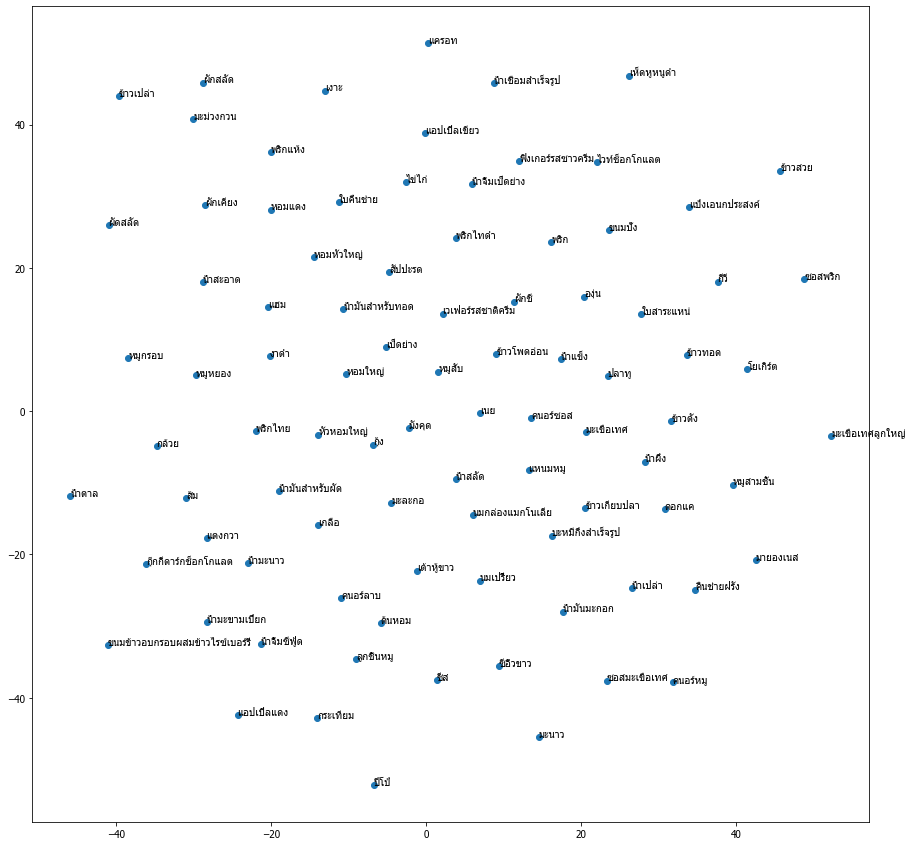

In [20]:
vocab = list(model.wv.vocab)
X = model[model.wv.vocab]
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X[:,:])

df = pd.DataFrame(X_tsne, index=vocab, columns=['x', 'y'])

plt.rcParams["font.family"] = "Tahoma"
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(1, 1, 1)

ax.scatter(df['x'], df['y'])
# ax.set_xticklabels(, fontproperties=font)
# df
for word, pos in df.iterrows():
  ax.annotate(word, pos)

In [0]:
import seaborn as sns

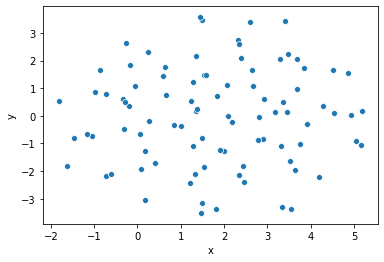

In [63]:
sns.scatterplot(x="x", y="y", data=df)

In [68]:
def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y'], str(point['val']))

label_point(df.x, df.y, df.vocab, plt.gca()) 

ValueError: ignored

<Figure size 432x288 with 1 Axes>